In [1]:
import numpy as np 
import pandas as pd 
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
import seaborn as sn


# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

###
import logging

from numpy import random
import gensim

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Datos_contaminantes_2000/Contaminantes_1991_2020')







In [3]:
print(data.head())
print (data.shape)
print (data.columns)

          CODIGO_MEDIDA  CODIGO_EOI  PROVINCIA  CODIGO_MUNICIPIO  \
0   08019043_1_20200430     8019043          8                19   
1   08019058_7_20200430     8019058          8                19   
2  08019044_10_20200430     8019044          8                19   
3  08019054_10_20200430     8019054          8                19   
4   08019054_8_20200430     8019054          8                19   

   CODIGO_ESTACION                        NOM_ESTACIO  MUNICIPIO    LATITUD  \
0             43.0               Barcelona (Eixample)  Barcelona  41.385315   
1             58.0      Barcelona (Observatori Fabra)  Barcelona  41.418430   
2             44.0  Barcelona (Gràcia - Sant Gervasi)  Barcelona  41.398724   
3             54.0       Barcelona (Parc Vall Hebron)  Barcelona  41.426110   
4             54.0       Barcelona (Parc Vall Hebron)  Barcelona  41.426110   

   LONGITUD  ALTITUD  ... V20 H21  V21 H22 V22 H23  V23  H24  V24  \
0  2.153800       26  ...   N NaN    N NaN   N 

### Borro columnas que no me interesa
### Arreglo las columnas
### Renombro columnas
### Borro contamianantes que no estan muy presentes en la mayoria de las muestras


In [4]:
data=data.drop(['CODIGO_MEDIDA', 'CODIGO_EOI', 'PROVINCIA', 'CODIGO_MUNICIPIO','V01'
                , 'V02','V03','V04','V05','V06', 'V07','V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14'
                , 'V15', 'V16', 'V17', 'V18', 'V19' ,'V20','V21','V22','V23','V24','Georeferencia'], axis=1)




In [5]:
data= data[data.AÑO != 2020]
data.shape

(487928, 40)

In [6]:
data.columns

Index(['CODIGO_ESTACION', 'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD',
       'ALTITUD', 'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'CONTAMINANTE',
       'UNIDADES', 'PUNTO_MUESTRA', 'AÑO', 'MES', 'DIA', 'FECHA', 'H01', 'H02',
       'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12',
       'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22',
       'H23', 'H24'],
      dtype='object')

In [7]:
data.describe()

,CODIGO_ESTACION,LATITUD,LONGITUD,ALTITUD,MAGNITUD,AÑO,MES,DIA,H01,H02,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,487928.000000,487928.000000,487928.000000,487928.000000,487928.000000,487928.000000,487928.000000,487928.000000,260671.000000,260688.000000,...,260086.000000,260318.000000,262944.000000,264350.000000,264531.000000,264734.000000,264741.000000,264264.000000,263208.000000,261322.000000
mean,40.198230,41.397536,2.156054,51.700935,13.589089,2005.872657,6.475984,15.714243,29.505612,27.240206,...,29.051943,28.101600,28.868831,30.498786,32.527940,34.373224,35.754532,35.410138,33.485832,31.349920
std,17.574164,0.015107,0.029237,52.908298,15.200615,7.623947,3.461600,8.803090,42.266409,38.734978,...,33.132458,32.501985,33.829748,36.370159,40.251796,44.438168,48.287411,49.444063,47.322306,44.490251
min,3.000000,41.378780,2.115200,3.000000,1.000000,1991.000000,1.000000,1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,41.385315,2.133099,12.000000,7.000000,2000.000000,3.000000,8.000000,2.000000,1.300000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,43.000000,41.389726,2.153399,35.000000,8.000000,2006.000000,6.000000,16.000000,15.000000,14.000000,...,18.000000,17.000000,17.000000,18.000000,19.000000,20.000000,20.000000,20.000000,18.000000,17.000000
75%,54.000000,41.403878,2.187398,81.000000,12.000000,2012.000000,9.000000,23.000000,44.000000,41.000000,...,45.000000,44.000000,45.000000,48.000000,51.000000,53.000000,54.000000,53.000000,50.000000,47.000000
max,58.000000,41.426110,2.204501,415.000000,65.000000,2019.000000,12.000000,31.000000,975.000000,958.000000,...,959.000000,859.000000,877.000000,942.000000,967.000000,956.000000,986.000000,974.000000,967.000000,952.000000


In [8]:
data = data[[ 'FECHA','AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD','ALTITUD', 'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'CONTAMINANTE','UNIDADES', 'PUNTO_MUESTRA', 'H01', 'H02','H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12','H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22','H23', 'H24']]


In [9]:
data =data[data.AÑO >= 2008]

In [10]:
#data.describe()

# contaminantes con más frecuencia en el dataser, los otros los elimino

In [11]:
#data.columns
#data.dtypes

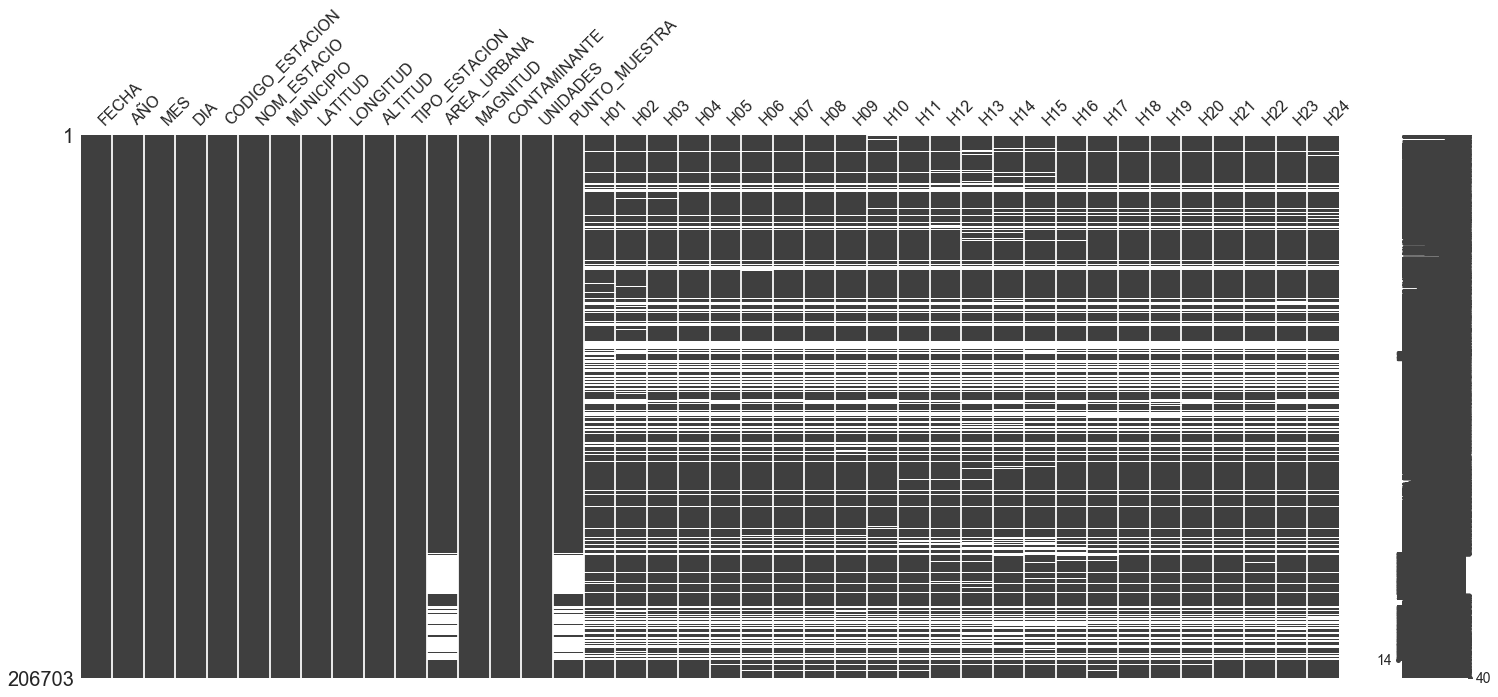

In [12]:
import missingno as msno
msno.matrix(data)

In [13]:
data =data[data.CONTAMINANTE != 'H2S']
data =data[data.CONTAMINANTE != 'HCNM']
data =data[data.CONTAMINANTE != 'HCT']
data =data[data.CONTAMINANTE != 'HCl']
data =data[data.CONTAMINANTE != 'NOX']
#data =data[data.CONTAMINANTE != 'PM10']
data =data[data.CONTAMINANTE != 'PM2.5']
data =data[data.CONTAMINANTE != 'PS']
data =data[data.CONTAMINANTE != 'C6H6']

In [14]:
data.CONTAMINANTE.unique()

array(['SO2', 'NO', 'PM10', 'NO2', 'O3', 'CO'], dtype=object)

In [15]:
data.columns

Index(['FECHA', 'AÑO', 'MES', 'DIA', 'CODIGO_ESTACION', 'NOM_ESTACIO',
       'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD', 'TIPO_ESTACION',
       'AREA_URBANA', 'MAGNITUD', 'CONTAMINANTE', 'UNIDADES', 'PUNTO_MUESTRA',
       'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
       'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20',
       'H21', 'H22', 'H23', 'H24'],
      dtype='object')

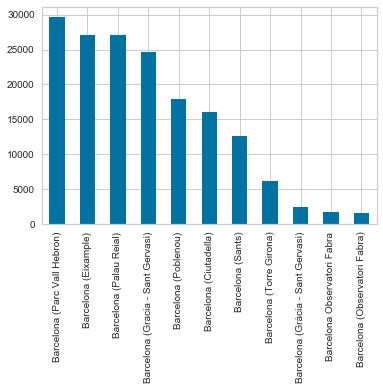

In [16]:
estacion= data.NOM_ESTACIO.value_counts()
estacion.plot.bar()

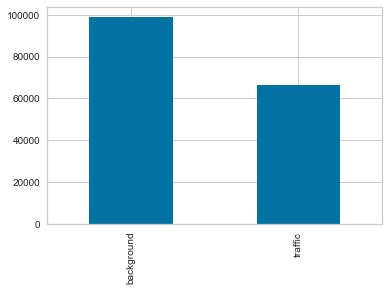

In [17]:


data =data[data.TIPO_ESTACION != '0']
tipo_est=data.TIPO_ESTACION.value_counts()
tipo_est.plot.bar()

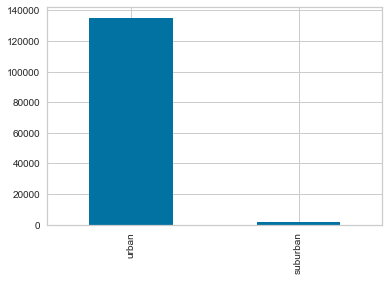

In [18]:
area=data.AREA_URBANA.value_counts()
area.plot.bar()

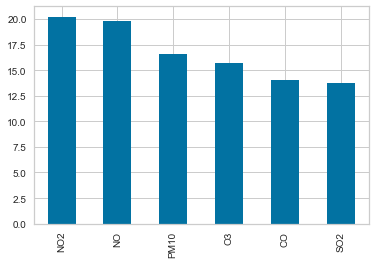

In [19]:
cont=data.CONTAMINANTE.value_counts()/len(data.CONTAMINANTE)*100
cont.plot.bar()

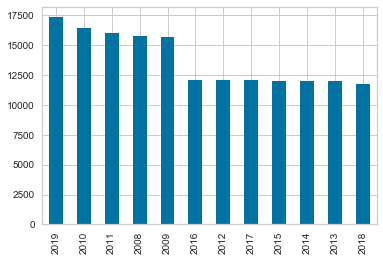

In [20]:
año=data.AÑO.value_counts()
año.plot.bar()


In [21]:
group_1=data.groupby(["TIPO_ESTACION","NOM_ESTACIO"])
group_1.first()


FECHA   AÑO  MES  DIA  \
TIPO_ESTACION NOM_ESTACIO                                                     
background    Barcelona (Ciutadella)             31/12/2018  2018   12   31   
              Barcelona (Observatori Fabra)      31/12/2018  2018   12   31   
              Barcelona (Palau Reial)            31/12/2018  2018   12   31   
              Barcelona (Parc Vall Hebron)       31/12/2018  2018   12   31   
              Barcelona (Poblenou)               31/12/2018  2018   12   31   
              Barcelona (Sants)                  31/12/2018  2018   12   31   
              Barcelona (Torre Girona)           06/12/2016  2016   12    6   
traffic       Barcelona (Eixample)               31/12/2018  2018   12   31   
              Barcelona (Gracia - Sant Gervasi)  28/02/2016  2016    2   28   
              Barcelona (Gràcia - Sant Gervasi)  31/12/2018  2018   12   31   
              Barcelona (Sants)                  03/02/2016  2016    2    3   

                                                 CODIGO_ESTACION  MUNICIPIO  \
TIPO_ESTACION NOM_ESTACIO                                                     
background    Barcelona (Ciutadella)                        50.0  Barcelona   
              Barcelona (Observatori Fabra)                 58.0  Barcelona   
              Barcelona (Palau Reial)                       57.0  Barcelona   
              Barcelona (Parc Vall Hebron)                  54.0  Barcelona   
              Barcelona (Poblenou)                           4.0  Barcelona   
              Barcelona (Sants)                             42.0  Barcelona   
              Barcelona (Torre Girona)                      56.0  Barcelona   
traffic       Barcelona (Eixample)                          43.0  Barcelona   
              Barcelona (Gracia - Sant Gervasi)             44.0  Barcelona   
              Barcelona (Gràcia - Sant Gervasi)             44.0  Barcelona   
              Barcelona (Sants)                             42.0  Barcelona   

                                                   LATITUD  LONGITUD  ALTITUD  \
TIPO_ESTACION NOM_ESTACIO                                                       
background    Barcelona (Ciutadella)             41.386406  2.187398        7   
              Barcelona (Observatori Fabra)      41.418430  2.123897      415   
              Barcelona (Palau Reial)            41.387490  2.115200       81   
              Barcelona (Parc Vall Hebron)       41.426110  2.148002      136   
              Barcelona (Poblenou)               41.403880  2.204501        3   
              Barcelona (Sants)                  41.378780  2.133099       35   
              Barcelona (Torre Girona)           41.389726  2.115836       81   
traffic       Barcelona (Eixample)               41.385315  2.153800       26   
              Barcelona (Gracia - Sant Gervasi)  41.398722  2.153399       57   
              Barcelona (Gràcia - Sant Gervasi)  41.398724  2.153399       57   
              Barcelona (Sants)                  41.378783  2.133099       35   

                                                AREA_URBANA  ...   H15   H16  \
TIPO_ESTACION NOM_ESTACIO                                    ...               
background    Barcelona (Ciutadella)                  urban  ...  46.0  48.0   
              Barcelona (Observatori Fabra)        suburban  ...  21.0  14.0   
              Barcelona (Palau Reial)                 urban  ...   1.0   1.0   
              Barcelona (Parc Vall Hebron)            urban  ...   2.0   2.0   
              Barcelona (Poblenou)                    urban  ...  67.0  68.0   
              Barcelona (Sants)                       urban  ...  14.0  13.0   
              Barcelona (Torre Girona)                urban  ...   1.0   2.0   
traffic       Barcelona (Eixample)                    urban  ...   2.0   2.0   
              Barcelona (Gracia - Sant Gervasi)       urban  ...   8.0  10.0   
              Barcelona (Gràcia - Sant Gervasi)       urban  ...

# Media de contaminante por dia a partir de la medida de la hora

In [22]:
data['avg'] = data[['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
       'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20',
       'H21', 'H22', 'H23', 'H24']].mean(axis=1)

In [23]:
### porcentage de avg que no existem (missing data)

print(data.avg.isnull().sum()/len(data)*100)

data = data[data['avg'].notna()]

19.536343732233362


In [24]:
data_df=data.copy()

## elimino el dato(columnas) de las horas, ya que he sacado la media por dia

In [25]:
data_df=data.drop(['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10','H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20','H21', 'H22', 'H23', 'H24'], axis=1)



In [26]:
data_df.head()

,FECHA,AÑO,MES,DIA,CODIGO_ESTACION,NOM_ESTACIO,MUNICIPIO,LATITUD,LONGITUD,ALTITUD,TIPO_ESTACION,AREA_URBANA,MAGNITUD,CONTAMINANTE,UNIDADES,PUNTO_MUESTRA,avg
1848,31/12/2018,2018,12,31,43.0,Barcelona (Eixample),Barcelona,41.385315,2.153800,26,traffic,urban,1,SO2,µg/m3,08019043_1_38,3.333333
1849,31/12/2018,2018,12,31,54.0,Barcelona (Parc Vall Hebron),Barcelona,41.426110,2.148002,136,background,urban,1,SO2,µg/m3,08019054_1_38,1.166667
1850,31/12/2018,2018,12,31,58.0,Barcelona (Observatori Fabra),Barcelona,41.418430,2.123897,415,background,suburban,7,NO,µg/m3,08019058_7_8,10.625000
1852,31/12/2018,2018,12,31,43.0,Barcelona (Eixample),Barcelona,41.385315,2.153800,26,traffic,urban,7,NO,µg/m3,08019043_7_8,155.250000
1854,31/12/2018,2018,12,31,44.0,Barcelona (Gràcia - Sant Gervasi),Barcelona,41.398724,2.153399,57,traffic,urban,10,PM10,µg/m3,08019044_10_47,38.750000


## info por estaciones

In [27]:
print(data_df.head())
print (data_df.shape)

           FECHA   AÑO  MES  DIA  CODIGO_ESTACION  \
1848  31/12/2018  2018   12   31             43.0   
1849  31/12/2018  2018   12   31             54.0   
1850  31/12/2018  2018   12   31             58.0   
1852  31/12/2018  2018   12   31             43.0   
1854  31/12/2018  2018   12   31             44.0   

                            NOM_ESTACIO  MUNICIPIO    LATITUD  LONGITUD  \
1848               Barcelona (Eixample)  Barcelona  41.385315  2.153800   
1849       Barcelona (Parc Vall Hebron)  Barcelona  41.426110  2.148002   
1850      Barcelona (Observatori Fabra)  Barcelona  41.418430  2.123897   
1852               Barcelona (Eixample)  Barcelona  41.385315  2.153800   
1854  Barcelona (Gràcia - Sant Gervasi)  Barcelona  41.398724  2.153399   

      ALTITUD TIPO_ESTACION AREA_URBANA  MAGNITUD CONTAMINANTE UNIDADES  \
1848       26       traffic       urban         1          SO2    µg/m3   
1849      136    background       urban         1          SO2    µg/m3   
1850 

In [28]:
data_df.columns

Index(['FECHA', 'AÑO', 'MES', 'DIA', 'CODIGO_ESTACION', 'NOM_ESTACIO',
       'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD', 'TIPO_ESTACION',
       'AREA_URBANA', 'MAGNITUD', 'CONTAMINANTE', 'UNIDADES', 'PUNTO_MUESTRA',
       'avg'],
      dtype='object')

In [29]:
data_df['dateInt']=data_df['AÑO'].astype(str) + data_df['MES'].astype(str).str.zfill(2) + data_df['DIA'].astype(str).str.zfill(2) 

In [30]:
data_df['Data'] = pd.to_datetime(data_df['dateInt'], format='%Y%m%d')

In [31]:
data_df=data_df.drop(['dateInt'], axis=1)

In [32]:
data_df.columns

Index(['FECHA', 'AÑO', 'MES', 'DIA', 'CODIGO_ESTACION', 'NOM_ESTACIO',
       'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD', 'TIPO_ESTACION',
       'AREA_URBANA', 'MAGNITUD', 'CONTAMINANTE', 'UNIDADES', 'PUNTO_MUESTRA',
       'avg', 'Data'],
      dtype='object')

In [33]:

ciutadella =data_df[data_df.NOM_ESTACIO == 'Barcelona (Ciutadella)']
observatori = data_df[data_df.NOM_ESTACIO == 'Barcelona (Observatori Fabra)']
palau= data_df[data_df.NOM_ESTACIO == 'Barcelona (Palau Reial)']
vall =data_df[data_df.NOM_ESTACIO == 'Barcelona (Parc Vall Hebron)']
poblenou =data_df[data_df.NOM_ESTACIO == 'Barcelona (Poblenou)']
torre =data_df[data_df.NOM_ESTACIO == 'Barcelona (Torre Girona)']
eixample = data_df[data_df.NOM_ESTACIO == 'Barcelona (Eixample)']
#gracia = data_df[data_df.CODIGO_ESTACION == 44]
#sagrera = data_df[data_df.NOM_ESTACIO == 'Barcelona (Sagrera)']
sants = data_df[data_df.NOM_ESTACIO == 'Barcelona (Sants)']
gervasi = data_df[(data_df.CODIGO_ESTACION == 44.0)]

# elimino la info por estaciones que no me sirve

In [34]:
ciutadella=ciutadella.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
observatori=observatori.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
palau=palau.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
vall=vall.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)

poblenou=poblenou.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
torre=torre.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
eixample=eixample.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
#sagrera=sagrera.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       #'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       #'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       #'PUNTO_MUESTRA'], axis=1)
sants=sants.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)
gervasi=gervasi.drop(['FECHA', 'AÑO', 'MES', 'DIA','CODIGO_ESTACION', 'CODIGO_ESTACION',
       'NOM_ESTACIO', 'MUNICIPIO', 'LATITUD', 'LONGITUD', 'ALTITUD',
       'TIPO_ESTACION', 'AREA_URBANA', 'MAGNITUD', 'UNIDADES',
       'PUNTO_MUESTRA'], axis=1)

In [35]:
print(ciutadella.head())
print(ciutadella.shape)
#####
print(observatori.head())
print(observatori.shape)
#####
print(palau.head())
print(palau.shape)
#####
print(vall.head())
print(vall.shape)
####
print(poblenou.head())
print(poblenou.shape)
####
print(torre.head())
print(torre.shape)
######
print(eixample.head())
print(eixample.shape)
####
#print(sagrera.head())
#print(sagrera.shape)
#####
print(sants.head())
print(sants.shape)
####
print(gervasi.head())
print(gervasi.shape)


     CONTAMINANTE        avg       Data
1859          NO2  50.208333 2018-12-31
1875           NO  86.541667 2018-12-31
2093           O3   5.000000 2018-12-31
2912          NO2  28.333333 2019-03-15
2913          NO2  30.875000 2019-03-14
(15489, 3)
     CONTAMINANTE        avg       Data
1850           NO  10.625000 2018-12-31
1867          NO2   7.791667 2018-12-31
1872         PM10   6.541667 2018-12-31
1876           O3  71.833333 2018-12-31
1881          NO2  21.166667 2019-03-15
(1609, 3)
     CONTAMINANTE        avg       Data
1855          SO2   1.083333 2018-12-31
1871           NO  24.041667 2018-12-31
2085           CO   0.200000 2018-12-31
2088           O3  13.875000 2018-12-31
2091         PM10  15.291667 2018-12-31
(17756, 3)
     CONTAMINANTE        avg       Data
1849          SO2   1.166667 2018-12-31
1857           NO  16.458333 2018-12-31
1862          NO2  42.333333 2018-12-31
1868           O3  24.375000 2018-12-31
1873         PM10  11.791667 2018-12-31
(24772, 

## creo un dataframe por estacion con sus respectivos contaminantes

In [36]:
ciutadella_def = ciutadella.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
observatori_def = observatori.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
###
palau_def= palau.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
vall_def =vall.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
poblenou_def =poblenou.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
torre_def =torre.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
eixample_def = eixample.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
#gracia = data_df[data_df.CODIGO_ESTACION == 44]
##
#sagrera_def = sagrera.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
sants_def = sants.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')
##
gervasi_def = gervasi.pivot_table(index='Data', columns='CONTAMINANTE', values='avg')

# missing values por estación

Ciutadella: 



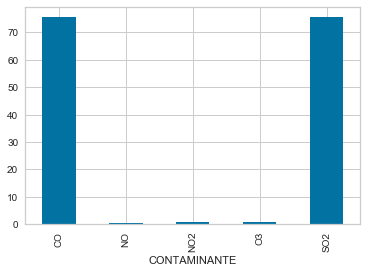

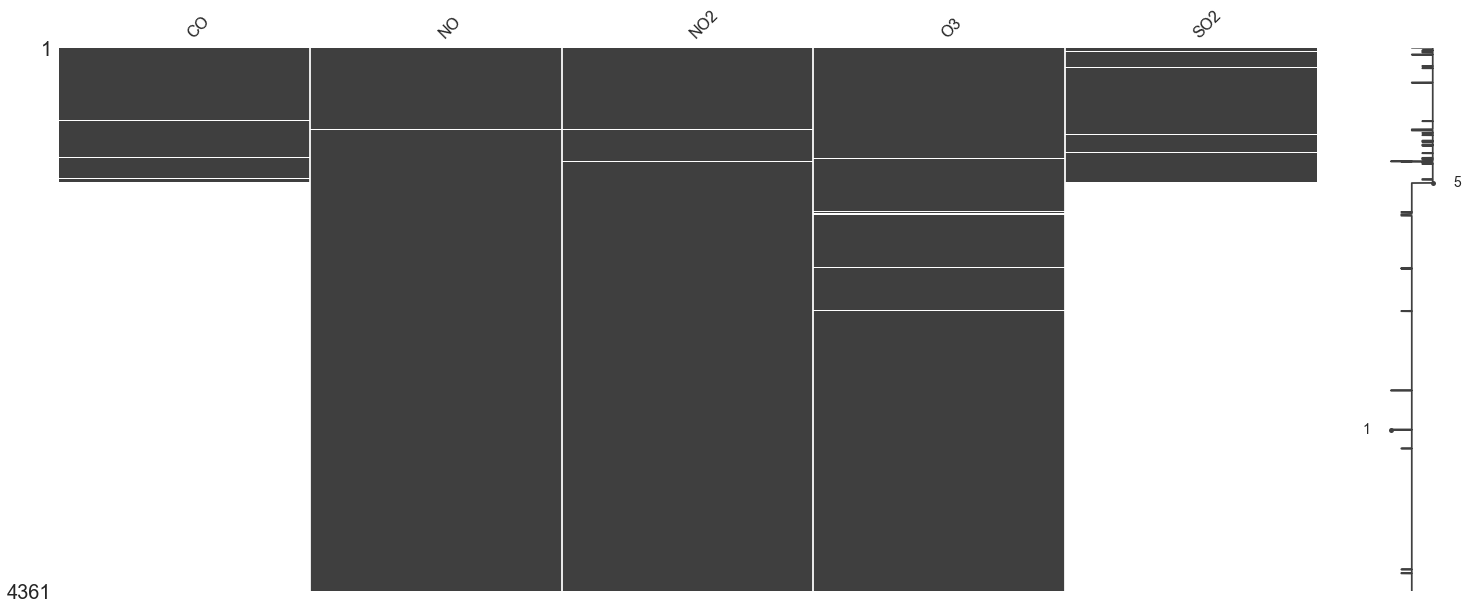

In [37]:
print('Ciutadella: \n')
x1=ciutadella_def.isnull().sum()/len(ciutadella_def)*100
x1.plot.bar()

msno.matrix(ciutadella_def)


observatori: 



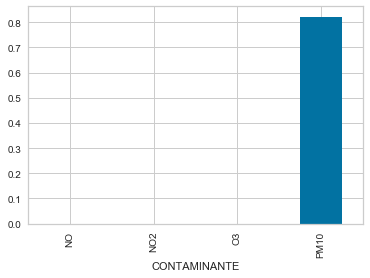

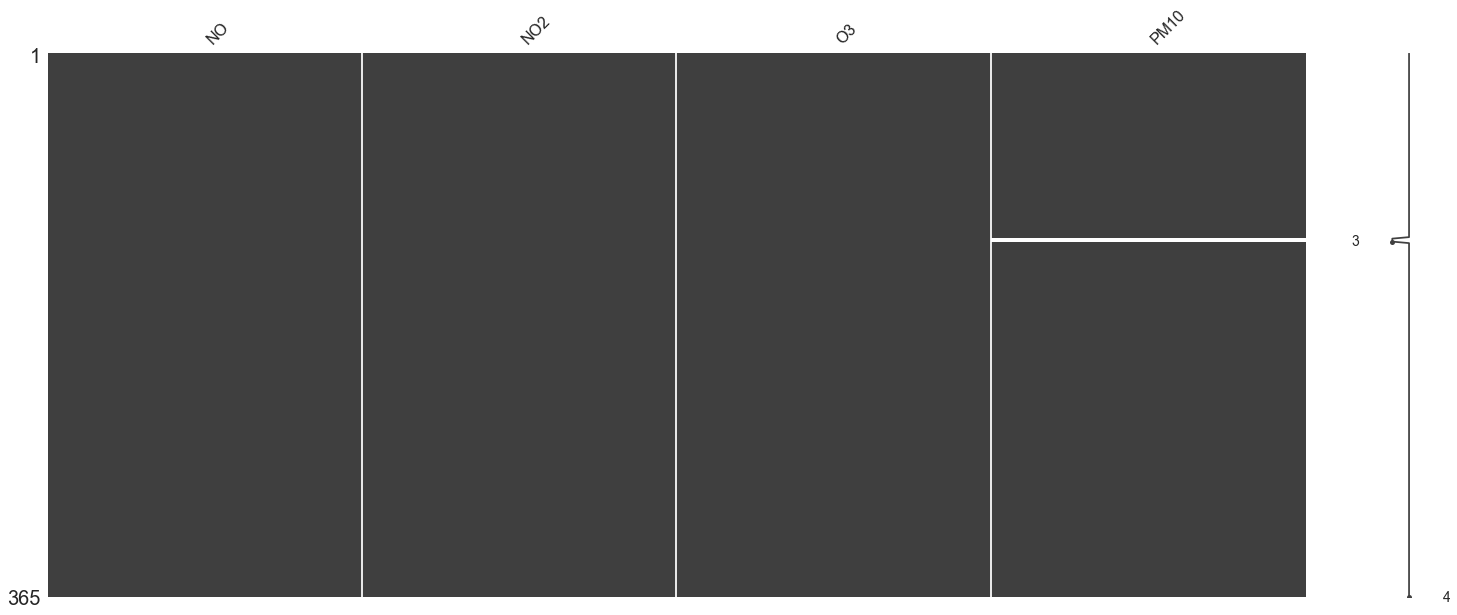

In [38]:
####
print('observatori: \n')
x2=observatori_def.isnull().sum()/len(observatori_def)*100
x2.plot.bar()
msno.matrix(observatori_def)

palau: 



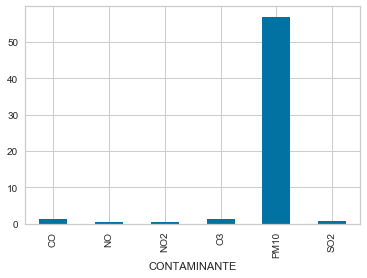

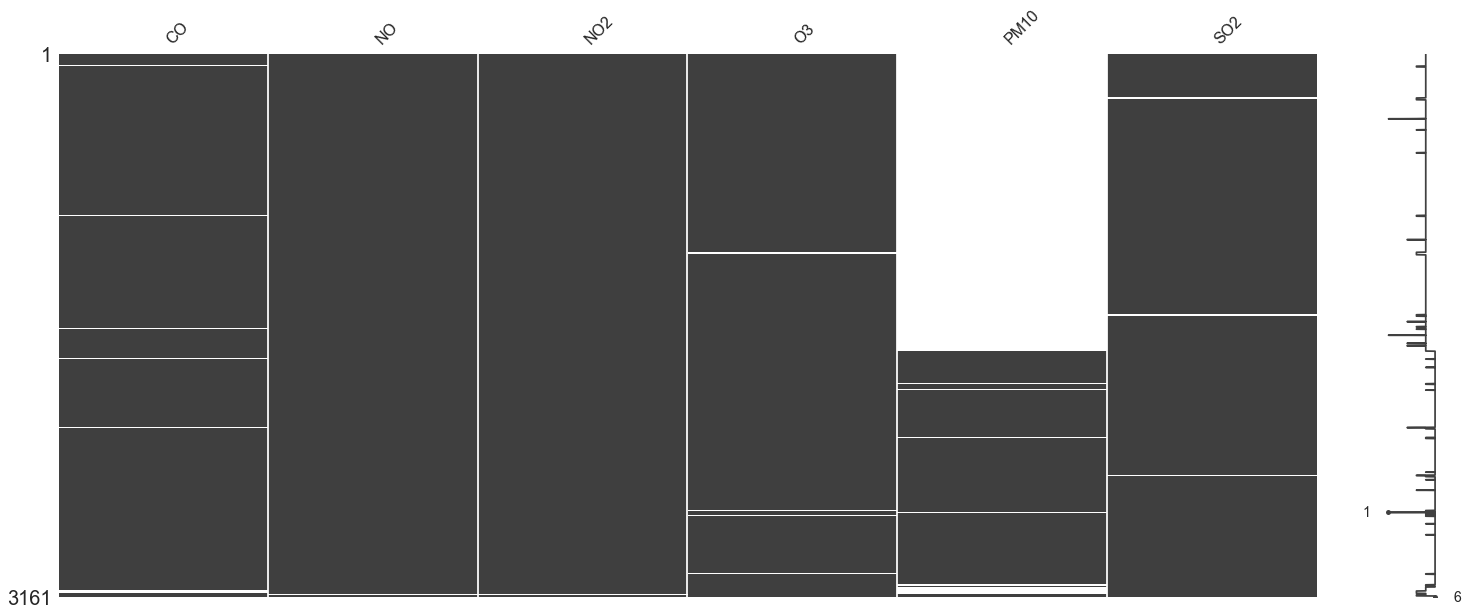

In [39]:
###
print('palau: \n')
x3=palau_def.isnull().sum()/len(palau_def)*100
x3.plot.bar()
msno.matrix(palau_def)

vall: 



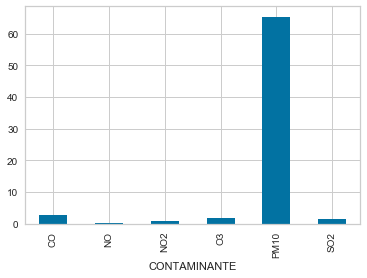

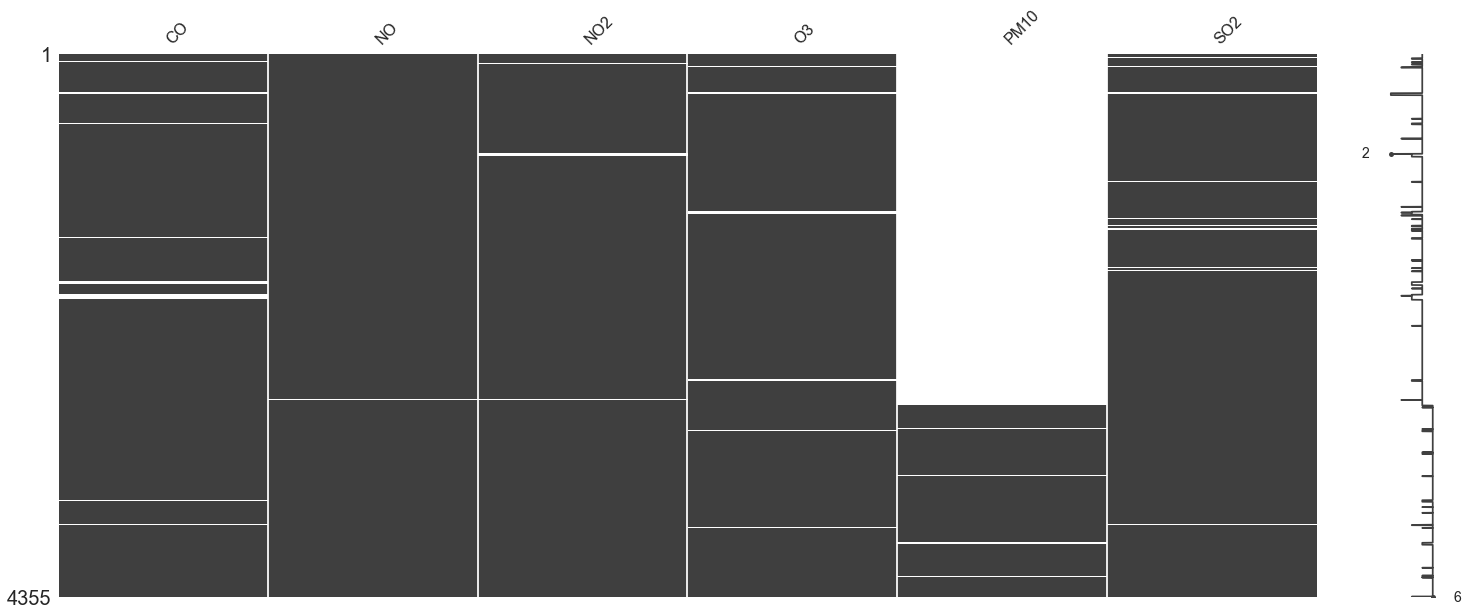

In [40]:
###
print('vall: \n')
x4=vall_def.isnull().sum()/len(vall_def)*100
x4.plot.bar()
msno.matrix(vall_def)

poblenou: 



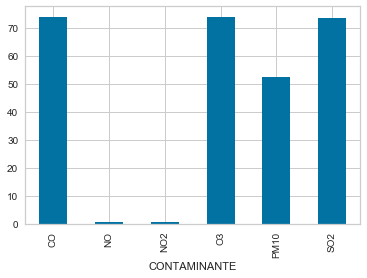

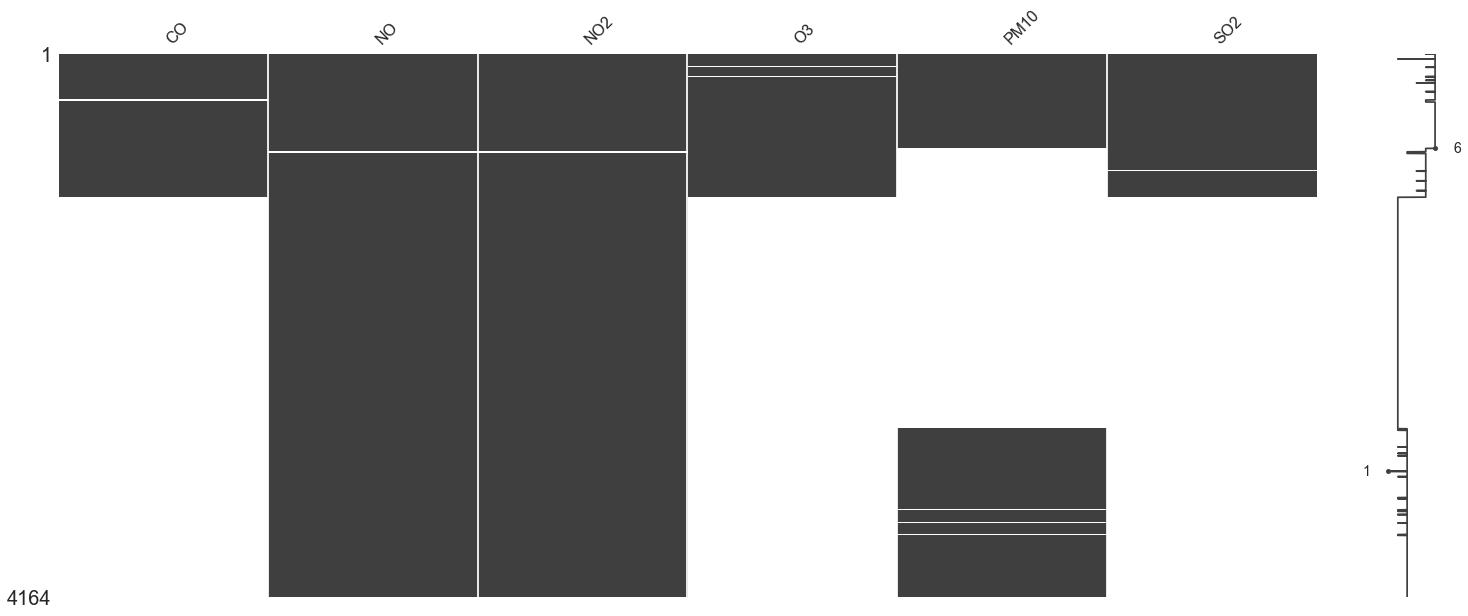

In [41]:
###
print('poblenou: \n')
x5=poblenou_def.isnull().sum()/len(poblenou_def)*100
x5.plot.bar()
msno.matrix(poblenou_def)

torre: 



CONTAMINANTE,CO,NO,NO2,O3,SO2
Data,,,,,
2011-01-01,0.329167,4.041667,37.333333,30.041667,1.000
2011-01-02,0.500000,12.250000,31.958333,33.500000,1.000
2011-01-03,0.525000,3.333333,24.458333,38.375000,1.000
2011-01-04,0.441667,20.041667,37.958333,32.708333,1.000
2011-01-05,0.637500,44.250000,65.625000,9.458333,1.375


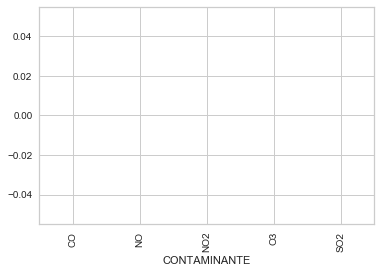

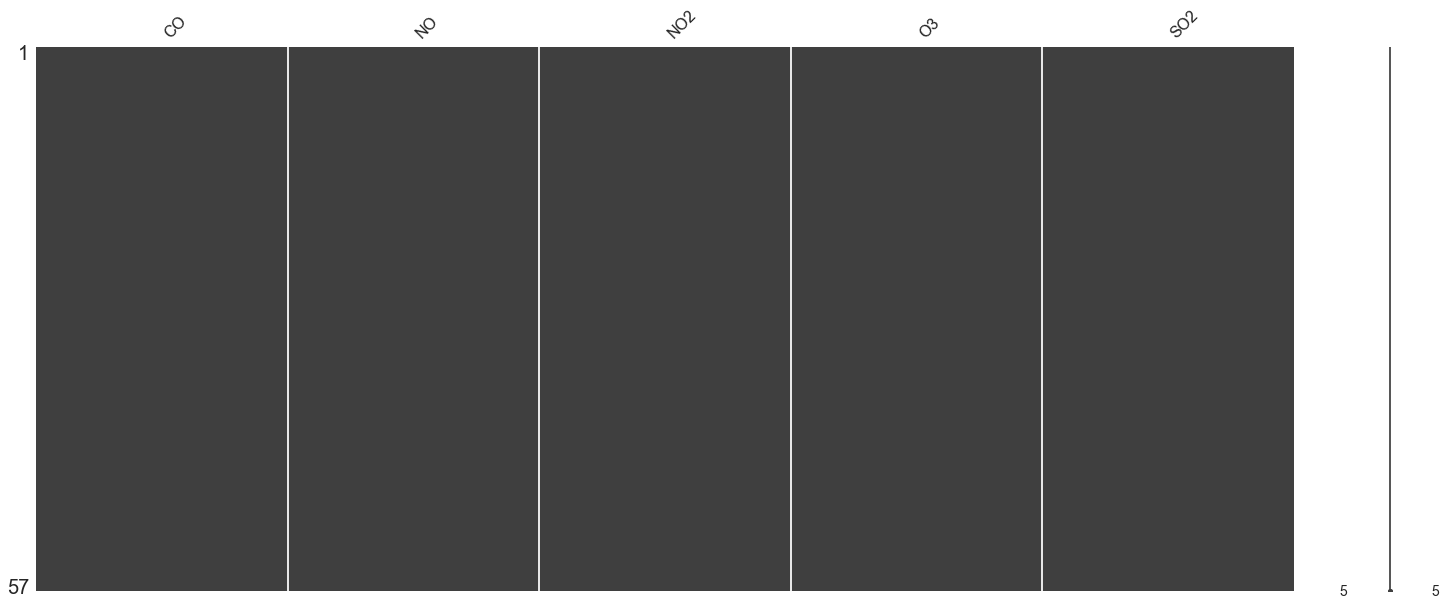

In [42]:
###
print('torre: \n')
x6=torre_def.isnull().sum()/len(torre_def)*100
x6.plot.bar()
msno.matrix(torre_def)
torre_def.head()

eixample: 



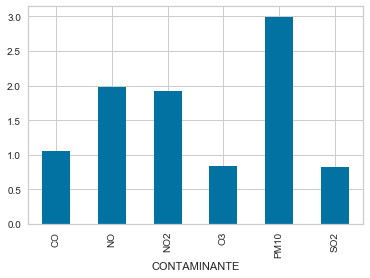

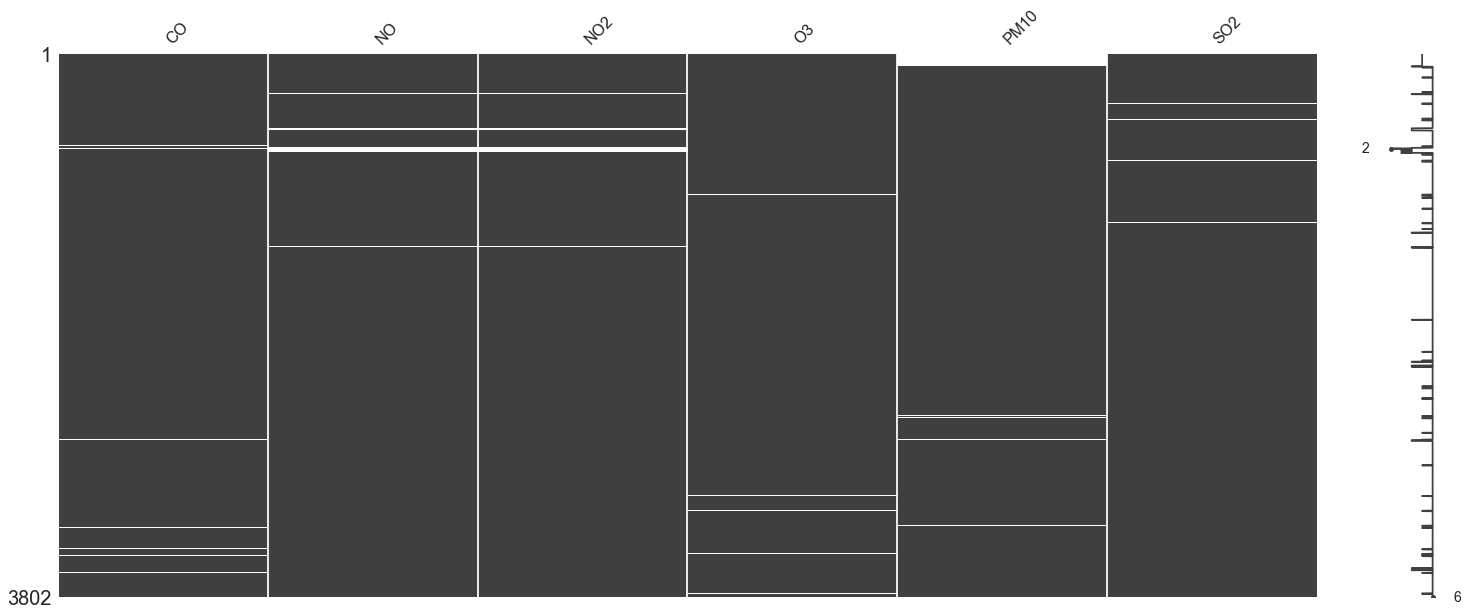

In [43]:
###
print('eixample: \n')
x7=eixample_def.isnull().sum()/len(eixample_def)*100
x7.plot.bar()
msno.matrix(eixample_def)

sants: 



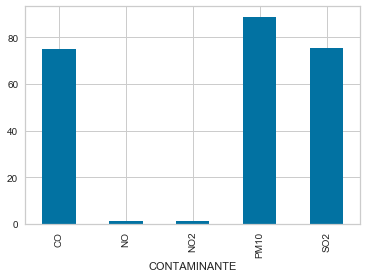

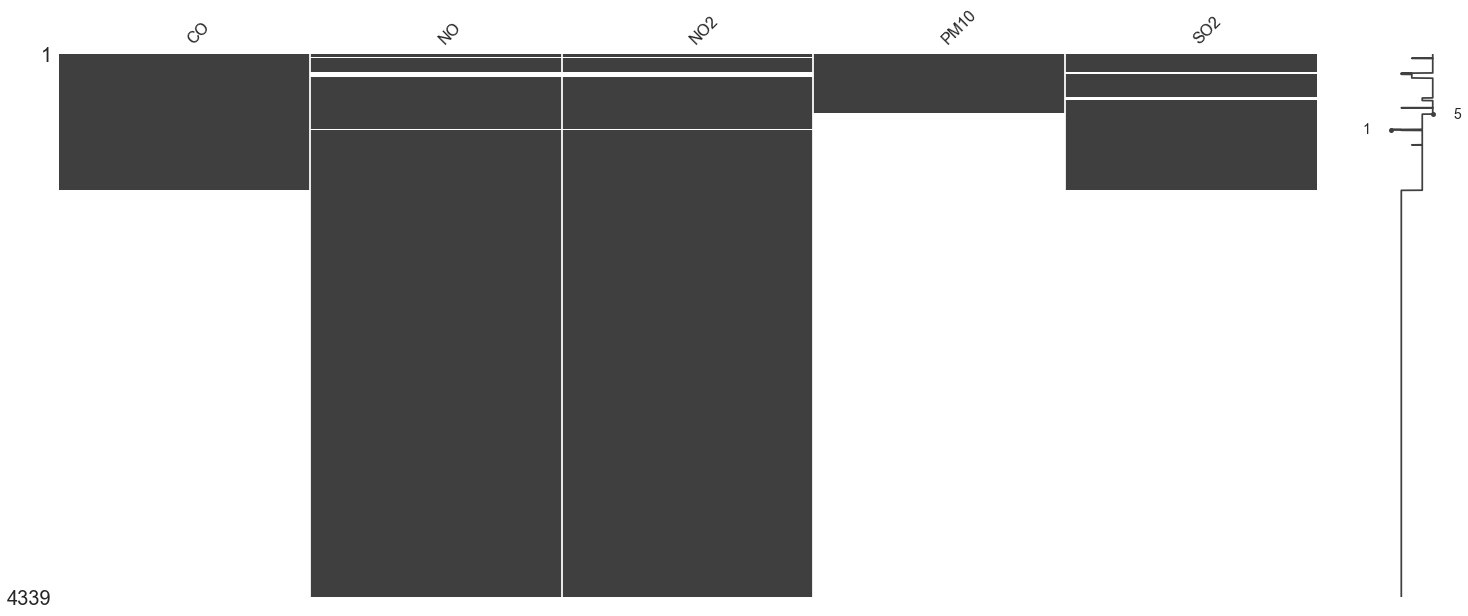

In [44]:
###
print('sants: \n')
x9=sants_def.isnull().sum()/len(sants_def)*100
x9.plot.bar()
msno.matrix(sants_def)

gervasi: 



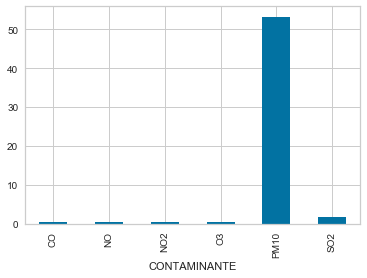

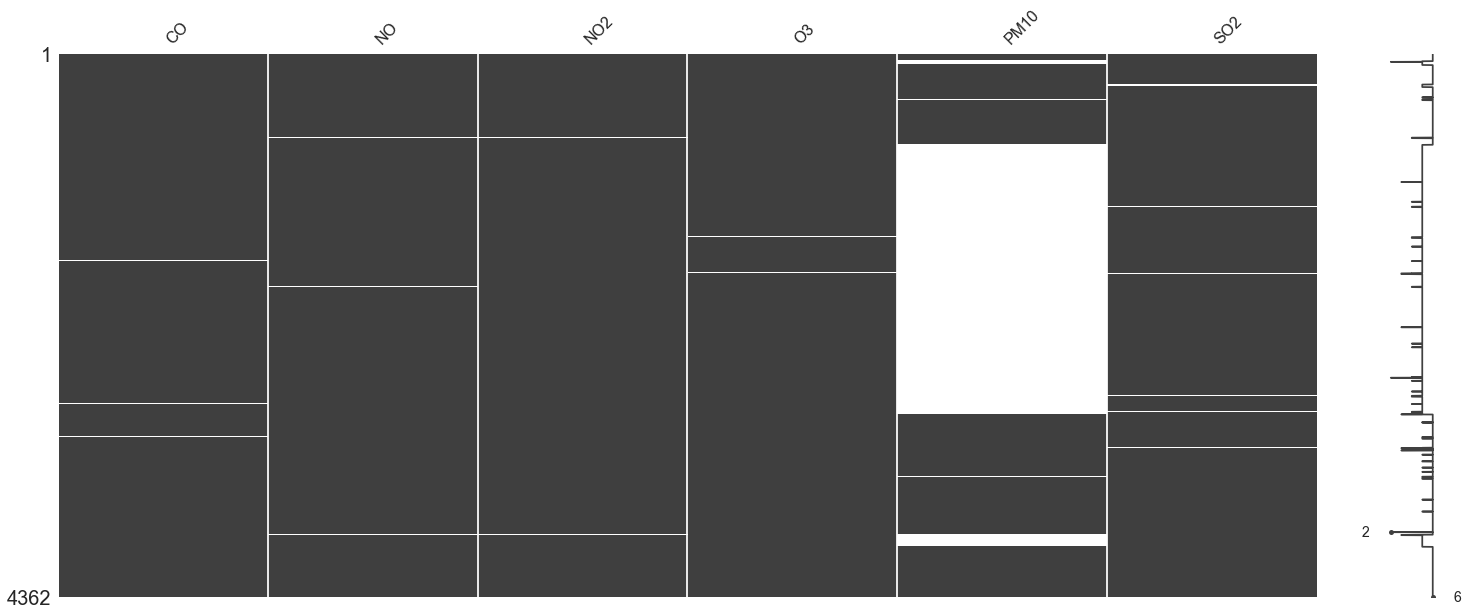

In [45]:
###
print('gervasi: \n',)
x10=gervasi_def.isnull().sum()/len(gervasi_def)*100
x10.plot.bar()
msno.matrix(gervasi_def)

# Media de contamianantes de los ultimos 10 años por estacion, día de máximos

##### ciutadella_def 
##### observatori_def 
##### palau_def
##### vall_def 
##### poblenou_def 
##### torre_def 
##### eixample_def 
#### sants_def 
#### gervasi_def 

In [46]:
ciutadella_def.head()

CONTAMINANTE,CO,NO,NO2,O3,SO2
Data,,,,,
2008-01-01,0.416667,NaN,NaN,17.875000,3.875000
2008-01-02,0.395833,31.100000,73.400000,6.375000,2.625000
2008-01-03,0.641667,92.666667,66.041667,6.000000,2.666667
2008-01-04,0.304167,19.666667,48.625000,16.333333,1.041667
2008-01-05,0.404167,23.625000,51.208333,8.791667,1.416667


In [47]:
print(ciutadella_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].mean())
print(ciutadella_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].max(),
      ciutadella_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].idxmax())

CONTAMINANTE
CO      0.367108
NO     15.865376
NO2    39.878003
O3     41.516015
SO2     3.259487
dtype: float64
CONTAMINANTE
CO       1.770833
NO     279.625000
NO2    119.916667
O3     115.166667
SO2     22.583333
dtype: float64 CONTAMINANTE
CO    2010-05-09
NO    2009-12-22
NO2   2012-03-13
O3    2019-04-20
SO2   2009-05-08
dtype: datetime64[ns]


In [48]:
##observatori
print(observatori_def[['NO', 'NO2', 'O3', 'PM10']].mean())
print(observatori_def[['NO', 'NO2', 'O3', 'PM10']].max(),
      observatori_def[['NO', 'NO2', 'O3', 'PM10']].idxmax())

CONTAMINANTE
NO       3.463112
NO2     11.565544
O3      81.618402
PM10    16.426246
dtype: float64
CONTAMINANTE
NO       18.958333
NO2      32.458333
O3      159.458333
PM10     86.416667
dtype: float64 CONTAMINANTE
NO     2019-02-07
NO2    2019-02-25
O3     2019-06-29
PM10   2019-12-17
dtype: datetime64[ns]


In [49]:
#palau_def.columns
print(palau_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].mean())
print(palau_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].max(),
      palau_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].idxmax())

CONTAMINANTE
CO       0.326084
NO       9.019994
NO2     31.976065
O3      53.436624
PM10    19.756597
SO2      2.059492
dtype: float64
CONTAMINANTE
CO        1.458333
NO      130.125000
NO2     117.458333
O3      122.458333
PM10    163.142857
SO2       9.791667
dtype: float64 CONTAMINANTE
CO     2012-02-16
NO     2015-12-16
NO2    2012-03-14
O3     2019-04-20
PM10   2019-12-17
SO2    2011-09-27
dtype: datetime64[ns]


In [50]:
#vall_def.columns
print(vall_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].mean())
print(vall_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].max(),
      vall_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].idxmax())

CONTAMINANTE
CO       0.305367
NO       8.168906
NO2     32.162618
O3      53.891733
PM10    21.943127
SO2      2.201856
dtype: float64
CONTAMINANTE
CO        1.417391
NO      114.916667
NO2      98.833333
O3      125.375000
PM10    109.708333
SO2      19.000000
dtype: float64 CONTAMINANTE
CO     2010-04-08
NO     2015-12-16
NO2    2009-10-07
O3     2013-09-01
PM10   2016-02-23
SO2    2013-05-26
dtype: datetime64[ns]


In [51]:
#poblenou_def.columns
print(poblenou_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].mean())
print(poblenou_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].max(),
      poblenou_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].idxmax())

CONTAMINANTE
CO       0.399999
NO      18.012992
NO2     43.196939
O3      36.138997
PM10    28.658404
SO2      3.084236
dtype: float64
CONTAMINANTE
CO        1.139130
NO      193.500000
NO2     111.458333
O3       93.043478
PM10    286.000000
SO2      18.625000
dtype: float64 CONTAMINANTE
CO     2010-10-28
NO     2015-12-16
NO2    2009-09-30
O3     2008-05-10
PM10   2017-06-24
SO2    2008-06-21
dtype: datetime64[ns]


In [52]:
#torre_def.columns
print(torre_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].mean())
print(torre_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].max(),
      torre_def[['CO', 'NO', 'NO2', 'O3', 'SO2']].idxmax())

CONTAMINANTE
CO      0.403814
NO     17.424588
NO2    49.957368
O3     34.969700
SO2     1.113173
dtype: float64
CONTAMINANTE
CO      0.666667
NO     61.333333
NO2    88.434783
O3     61.458333
SO2     2.541667
dtype: float64 CONTAMINANTE
CO    2011-01-06
NO    2011-01-14
NO2   2011-02-07
O3    2011-02-11
SO2   2011-01-06
dtype: datetime64[ns]


In [53]:
#eixample_def.columns
print(eixample_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].mean())
print(eixample_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].max(),
      eixample_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].idxmax())#

CONTAMINANTE
CO       0.608781
NO      38.017613
NO2     57.365427
O3      34.951404
PM10    29.167343
SO2      2.701316
dtype: float64
CONTAMINANTE
CO        2.425000
NO      316.250000
NO2     147.250000
O3      112.291667
PM10    133.333333
SO2      24.375000
dtype: float64 CONTAMINANTE
CO     2008-12-22
NO     2008-12-22
NO2    2008-02-07
O3     2019-04-20
PM10   2008-10-16
SO2    2008-02-07
dtype: datetime64[ns]


In [54]:
#sants_def.columns
print(sants_def[['CO', 'NO', 'NO2', 'PM10', 'SO2']].mean())
print(sants_def[['CO', 'NO', 'NO2', 'PM10', 'SO2']].max(),
      sants_def[['CO', 'NO', 'NO2', 'PM10', 'SO2']].idxmax())

CONTAMINANTE
CO       0.327744
NO      11.560050
NO2     36.467876
PM10    51.672700
SO2      2.524867
dtype: float64
CONTAMINANTE
CO        1.343478
NO      207.708333
NO2     111.000000
PM10    169.571429
SO2      14.391304
dtype: float64 CONTAMINANTE
CO     2008-01-30
NO     2008-12-22
NO2    2015-02-11
PM10   2008-10-16
SO2    2009-12-29
dtype: datetime64[ns]


In [55]:
gervasi_def.columns
print(gervasi_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].mean())
print(gervasi_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].max(),
      gervasi_def[['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']].idxmax())#

CONTAMINANTE
CO       0.499811
NO      28.650995
NO2     55.831961
O3      39.617969
PM10    27.882196
SO2      2.949119
dtype: float64
CONTAMINANTE
CO        3.413043
NO      276.727273
NO2     145.500000
O3      101.458333
PM10    116.041667
SO2      35.791667
dtype: float64 CONTAMINANTE
CO     2015-12-16
NO     2015-12-16
NO2    2012-03-30
O3     2018-08-05
PM10   2008-10-16
SO2    2008-05-05
dtype: datetime64[ns]


# Analisis de contaminanates de la última decada!

## ciutadella_def / background

Ciutadella: 



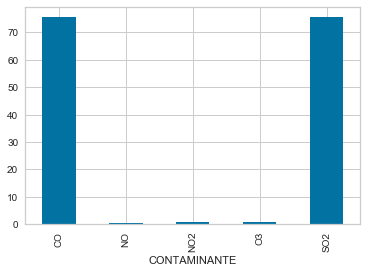

In [56]:
#
print('Ciutadella: \n')
x1=ciutadella_def.isnull().sum()/len(ciutadella_def)*100
x1.plot.bar()
###


In [57]:
ciutadella_def['month'] = ciutadella_def.index.month
ciutadella_def['year'] = ciutadella_def.index.year
year_avg_ciu_o3 = pd.pivot_table(ciutadella_def, values='O3', index='year', aggfunc='mean')
year_avg_ciu_NO = pd.pivot_table(ciutadella_def, values='NO', index='year', aggfunc='mean')
year_avg_ciu_NO2 = pd.pivot_table(ciutadella_def, values='NO2', index='year', aggfunc='mean')



## palau_def / background

Palau: 



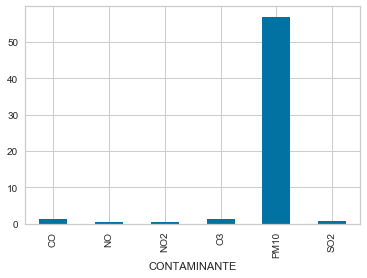

In [58]:
print('Palau: \n')
x1=palau_def.isnull().sum()/len(palau_def)*100
x1.plot.bar()


In [59]:
palau_def['month'] = palau_def.index.month
palau_def['year'] = palau_def.index.year
year_avg_palau_co = pd.pivot_table(palau_def, values='CO', index='year', aggfunc='mean') #
year_avg_palau_no = pd.pivot_table(palau_def, values='NO', index='year', aggfunc='mean')#
year_avg_palau_no2 = pd.pivot_table(palau_def, values='NO2', index='year', aggfunc='mean')#
year_avg_palau_o3 = pd.pivot_table(palau_def, values='O3', index='year', aggfunc='mean')
year_avg_palau_so2 = pd.pivot_table(palau_def, values='SO2', index='year', aggfunc='mean')#



## vall_def / background

Vall: 



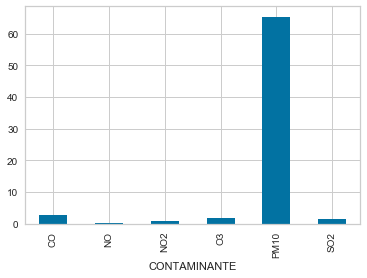

In [60]:
print('Vall: \n')
x1=vall_def.isnull().sum()/len(vall_def)*100
x1.plot.bar()

In [61]:
vall_def['month'] = vall_def.index.month
vall_def['year'] = vall_def.index.year
year_avg_vall_co = pd.pivot_table(vall_def, values='CO', index='year', aggfunc='mean') #
year_avg_vall_no = pd.pivot_table(vall_def, values='NO', index='year', aggfunc='mean')#
year_avg_vall_no2 = pd.pivot_table(vall_def, values='NO2', index='year', aggfunc='mean')#
year_avg_vall_o3 = pd.pivot_table(vall_def, values='O3', index='year', aggfunc='mean')#
year_avg_vall_so2 = pd.pivot_table(vall_def, values='SO2', index='year', aggfunc='mean')


## poblenou_def

Poblenou: 



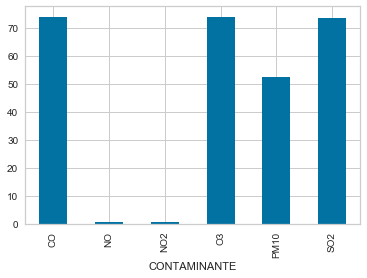

In [62]:
print('Poblenou: \n')
x1=poblenou_def.isnull().sum()/len(poblenou_def)*100
x1.plot.bar()

In [63]:
poblenou_def['month'] = poblenou_def.index.month
poblenou_def['year'] = poblenou_def.index.year
year_avg_poblenou_no = pd.pivot_table(poblenou_def, values='NO', index='year', aggfunc='mean') #
year_avg_poblenou_no2 = pd.pivot_table(poblenou_def, values='NO2', index='year', aggfunc='mean')#

## torre_def

Torre Girona: 



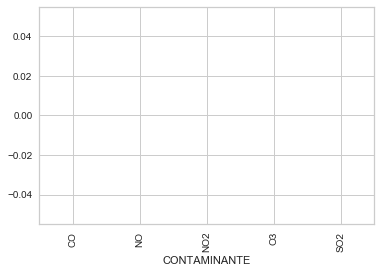

In [64]:
print('Torre Girona: \n')
x1=torre_def.isnull().sum()/len(torre_def)*100
x1.plot.bar()

In [65]:
torre_def['month'] = torre_def.index.month
torre_def['year'] = torre_def.index.year
year_avg_torre_co = pd.pivot_table(torre_def, values='CO', index='year', aggfunc='mean') #
year_avg_torre_no = pd.pivot_table(torre_def, values='NO', index='year', aggfunc='mean')
year_avg_torre_no2 = pd.pivot_table(torre_def, values='NO2', index='year', aggfunc='mean')
year_avg_torre_o3 = pd.pivot_table(torre_def, values='O3', index='year', aggfunc='mean')
year_avg_torre_so2 = pd.pivot_table(torre_def, values='SO2', index='year', aggfunc='mean')

## observatori_def

Observatori Pompeu Fabra: 



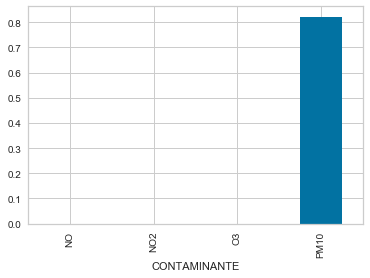

In [66]:
print('Observatori Pompeu Fabra: \n')
x1=observatori_def.isnull().sum()/len(observatori_def)*100
x1.plot.bar()
#observatori_def

In [67]:
observatori_def['month'] = observatori_def.index.month
observatori_def['year'] = observatori_def.index.year
year_avg_observatori_no = pd.pivot_table(observatori_def, values='NO', index='year', aggfunc='mean')#
year_avg_observatori_no2 = pd.pivot_table(observatori_def, values='NO2', index='year', aggfunc='mean')#
year_avg_observatori_o3 = pd.pivot_table(observatori_def, values='O3', index='year', aggfunc='mean')#
year_avg_observatori_PM10 = pd.pivot_table(observatori_def, values='PM10', index='year', aggfunc='mean')

## eixample_def.columns

Observatori Pompeu Fabra: 



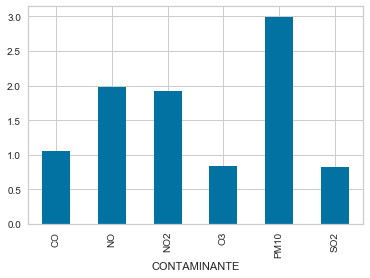

In [68]:
print('Observatori Pompeu Fabra: \n')
x1=eixample_def.isnull().sum()/len(eixample_def)*100
x1.plot.bar()
#eixample_def

In [69]:
eixample_def['month'] = eixample_def.index.month
eixample_def['year'] = eixample_def.index.year
year_avg_eixample_co = pd.pivot_table(eixample_def, values='CO', index='year', aggfunc='mean')#
year_avg_eixample_no = pd.pivot_table(eixample_def, values='NO', index='year', aggfunc='mean')#
year_avg_eixample_no2 = pd.pivot_table(eixample_def, values='NO2', index='year', aggfunc='mean')#
year_avg_eixample_O3 = pd.pivot_table(eixample_def, values='O3', index='year', aggfunc='mean')#
year_avg_eixample_pm10 = pd.pivot_table(eixample_def, values='PM10', index='year', aggfunc='mean')#
year_avg_eixample_so2 = pd.pivot_table(eixample_def, values='SO2', index='year', aggfunc='mean')#

## sants_def

Sants: 



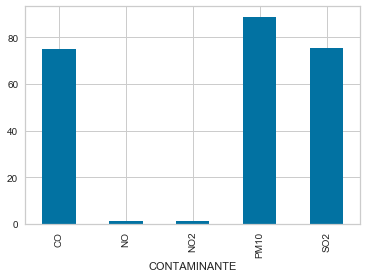

In [70]:
print('Sants: \n')
x1=sants_def.isnull().sum()/len(sants_def)*100
x1.plot.bar()
#sants_def

In [71]:
sants_def['month'] = sants_def.index.month
sants_def['year'] = sants_def.index.year

year_avg_sants_no = pd.pivot_table(sants_def, values='NO', index='year', aggfunc='mean')#
year_avg_sants_no2 = pd.pivot_table(sants_def, values='NO2', index='year', aggfunc='mean')#


## gervasi_def.columns

Sants: 



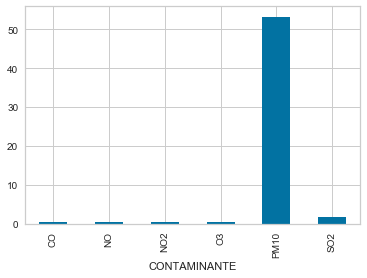

In [72]:
print('Sants: \n')
x1=gervasi_def.isnull().sum()/len(gervasi_def)*100
x1.plot.bar()
#gervasi_def

In [73]:
gervasi_def['month'] = gervasi_def.index.month
gervasi_def['year'] = gervasi_def.index.year

year_avg_gervasi_co = pd.pivot_table(gervasi_def, values='CO', index='year', aggfunc='mean')#
year_avg_gervasi_no = pd.pivot_table(gervasi_def, values='NO', index='year', aggfunc='mean')#
year_avg_gervasi_no2 = pd.pivot_table(gervasi_def, values='NO2', index='year', aggfunc='mean')#
year_avg_gervasi_o3 = pd.pivot_table(gervasi_def, values='O3', index='year', aggfunc='mean')
year_avg_gervasi_so2 = pd.pivot_table(gervasi_def, values='SO2', index='year', aggfunc='mean')

In [74]:
data_conta = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Datos_contaminantes_2000/Contaminantes_1991_2020_defnitivo_02.csv')

data_conta['year'] = pd.DatetimeIndex(data_conta['Data']).year
data_conta =data_conta[(data_conta.year >= 2008)&(data_conta.year <= 2019)]
year_avg_co = pd.pivot_table(data_conta, values='CO', index='year', aggfunc='mean')
year_avg_no = pd.pivot_table(data_conta, values='NO', index='year', aggfunc='mean')
year_avg_o3 = pd.pivot_table(data_conta, values='O3', index='year', aggfunc='mean')
year_avg_no2 = pd.pivot_table(data_conta, values='NO2', index='year', aggfunc='mean')




In [75]:
year_avg_co =year_avg_co[(year_avg_co.index >= 2008)&(year_avg_co.index <= 2019)]

# Contaminacion de CO desde las diferentes estaciones

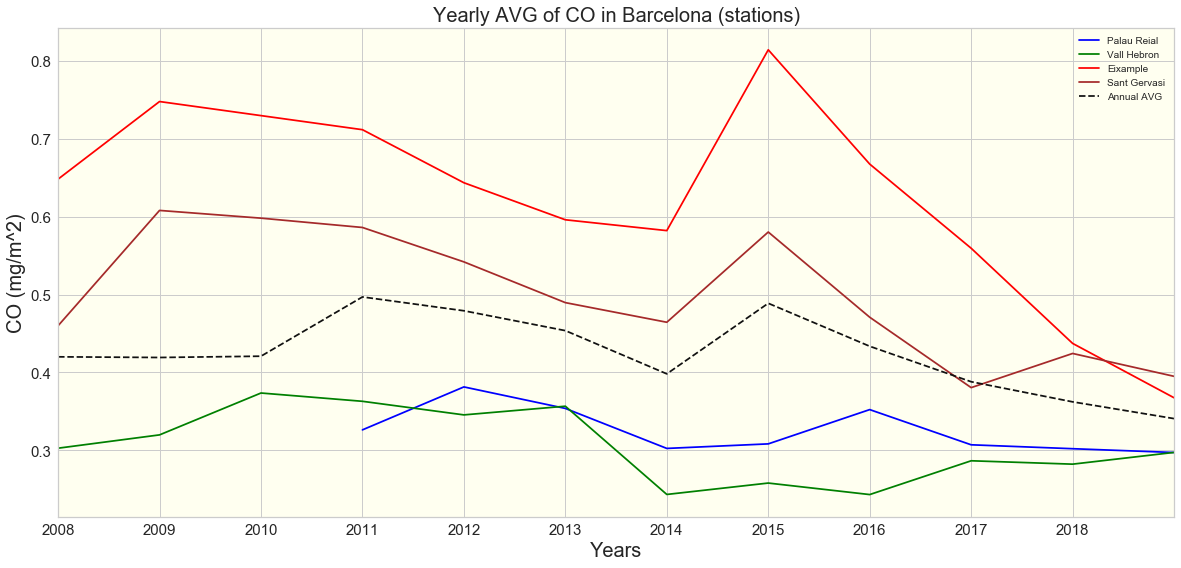

In [76]:
#sns.color_palette("Paired")
ax = plt.axes()
ax.set_facecolor("ivory")

year_avg_palau_co.CO.plot(figsize=(20,9), label='Palau Reial', legend= True, color='blue')
year_avg_vall_co.CO.plot(figsize=(20,9), label='Vall Hebron', legend= True, color='green')
#year_avg_torre_co.CO.plot(figsize=(20,8), label='Torre Girona', legend= True)
year_avg_eixample_co.CO.plot(figsize=(20,9), label='Eixample', legend= True, color='red')
year_avg_gervasi_co.CO.plot(figsize=(20,9), label='Sant Gervasi', legend= True, color='brown')
year_avg_co.CO.plot(figsize=(20,9), label='Annual AVG', legend= True, color='k', linestyle='--')
plt.yticks(size = 15)
plt.title('Yearly AVG of CO in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('CO (mg/m^2)', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
#plt.savefig('005_Yearly_pollutants_CO_in_Barcelona_presentation.png', dpi=1000)
#plt.grid(False)
plt.show()

In [77]:
year_avg_palau_co['palau_co']=year_avg_palau_co['CO']
year_avg_vall_co['vall_co']=year_avg_vall_co['CO']
year_avg_eixample_co['eix_co']=year_avg_eixample_co['CO']
year_avg_gervasi_co['gervasi_co']=year_avg_gervasi_co['CO']

In [78]:

co_df=pd.concat([year_avg_palau_co.palau_co, year_avg_vall_co.vall_co, year_avg_eixample_co.eix_co, year_avg_gervasi_co.gervasi_co], axis=1)

In [79]:
#co_df.head()

In [80]:
#co_df.columns
#co_df.gervasi_co.tolist()

In [81]:
r = [0,1,2,3,4, 5, 6, 7, 8, 9,10,11]
raw_data = {'Palau': [0,0,0,
 0.3263302255105599,
 0.3814549606293733,
 0.3538574970102766,
 0.302503726965907,
 0.3083324284900032,
 0.35233386013763934,
 0.30715462928149007,
 0.3021363869701468,
 0.29727774213050384], \
        'Vall': [0.30279500021292527,
 0.3198782355374964,
 0.3736270613078175,
 0.36299022233804856,
 0.3455519384623717,
 0.35668467438586005,
 0.24343233097434808,
 0.2580396417162355,
 0.24327710217915438,
 0.2866333545753534,
 0.28230849584186407,
 0.29738039720102316], \
        'Eixample': [0.648165316976167,
 0.7477758539082148,
 0,
 0.7116453406566831,
 0.6435321471812817,
 0.5959899232012568,
 0.5820935070227414,
 0.8141998909369372,
 0.6675035761835126,
 0.5594513857614546,
 0.4373130773885353,
 0.3675154514300663], \
        'gervasi': [0.4599757631297189,
 0.6080004192036573,
 0.5980908731300885,
 0.5861312118806079,
 0.5419552078657219,
 0.48964899779227655,
 0.4644619021042487,
 0.5802830668652352,
 0.4709143645837225,
 0.38054183960077215,
 0.42439339734309534,
 0.3950517960650569]}
            
        
df = pd.DataFrame(raw_data)

In [82]:
#df.head(13)

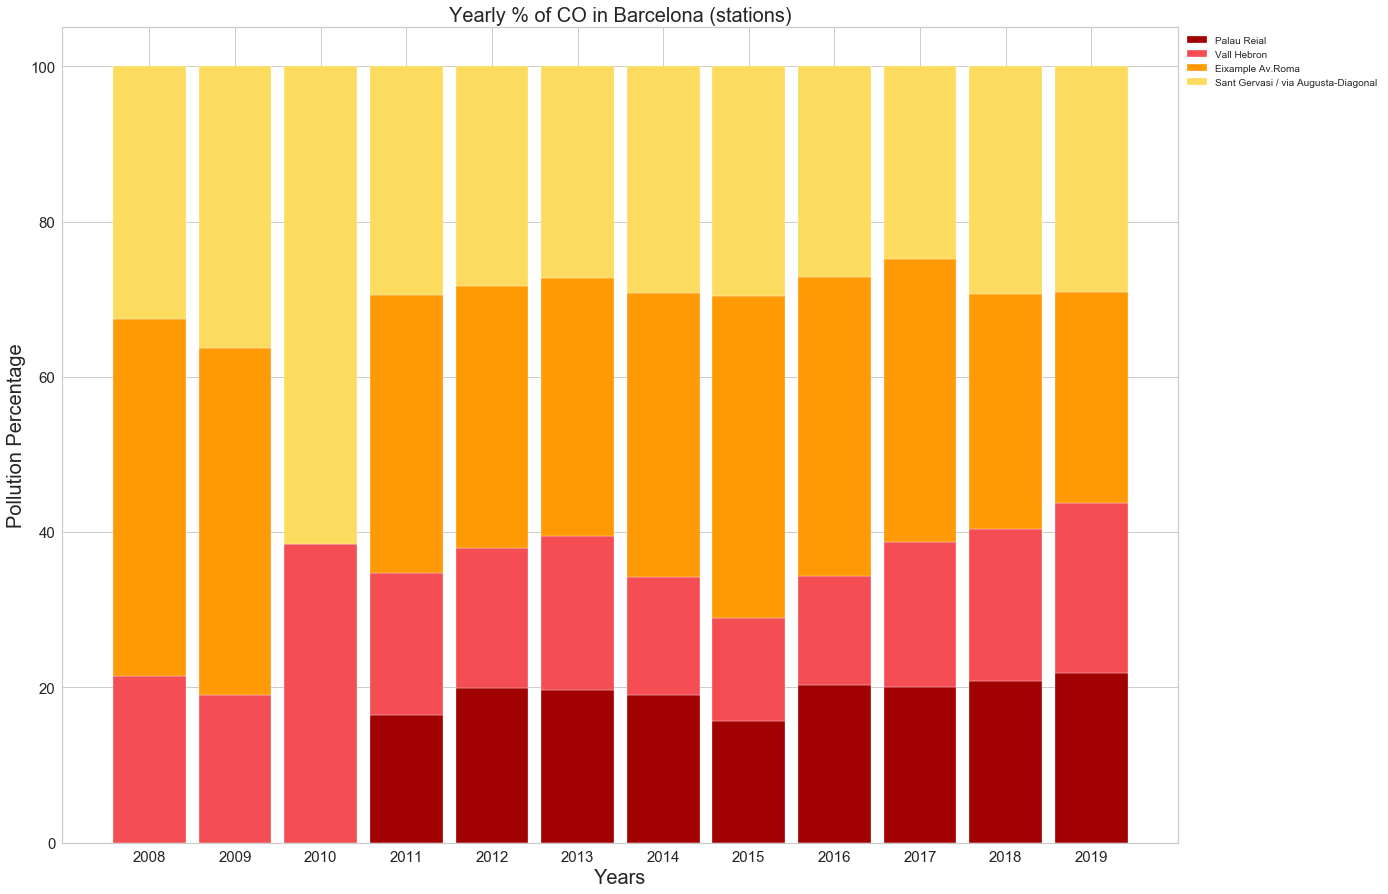

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

plt.figure(figsize=(20,15))

# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['Palau'], df['Vall'], df['Eixample'], df['gervasi'])]
Palau = [i / j * 100 for i,j in zip(df['Palau'], totals)]
vall = [i / j * 100 for i,j in zip(df['Vall'], totals)]
eixample = [i / j * 100 for i,j in zip(df['Eixample'], totals)]
gervasi = [i / j * 100 for i,j in zip(df['gervasi'], totals)]


# plot

barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
            '2019')
# Create PFHxA Bars
plt.bar(r, Palau, color='#A20101', edgecolor='white', width=barWidth, label="Palau Reial")
# Create PFHpA Bars
plt.bar(r, vall, bottom=Palau, color='#F44E54', edgecolor='white', 
width=barWidth, label="Vall Hebron")
# Create PFOA Bars
plt.bar(r, eixample, bottom=[i+j for i,j in zip(Palau, vall)], color='#FF9904', 
edgecolor='white', width=barWidth, label="Eixample Av.Roma")
# Create PFNA Bars
plt.bar(r, gervasi, bottom=[i+j+k for i,j,k in zip(Palau, vall, eixample)], 
color='#FDDB5E', edgecolor='white', width=barWidth, label="Sant Gervasi / via Augusta-Diagonal")



# Custom x axis
plt.title('Yearly % of CO in Barcelona (stations)', size=20)
plt.xticks(r, names, size=15)
plt.yticks(size=15)
plt.xlabel("Years", size=20)

# Custom y axis
plt.ylabel("Pollution Percentage", size=20)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.savefig('005_Yearly_pollutants_CO%_in_Barcelona_presentation.png', dpi=210)
plt.show()


In [84]:
totals

[1.4109360803188111,
 1.6756545086493686,
 0.9717179344379059,
 1.9870970003858994,
 1.9124942541387486,
 1.79618109238967,
 1.5924914670672452,
 1.9608550280084112,
 1.7340289030840288,
 1.53378120921907,
 1.4461513575436415,
 1.3572253868266504]

In [85]:
print ('Años más contaminantes Palau: \n',year_avg_palau_co.nlargest(5, ['CO'])) 

Años más contaminantes Palau: 
 CONTAMINANTE        CO  palau_co
year                            
2012          0.381455  0.381455
2013          0.353857  0.353857
2016          0.352334  0.352334
2011          0.326330  0.326330
2015          0.308332  0.308332


# Contaminacion de O3 desde las diferentes estaciones

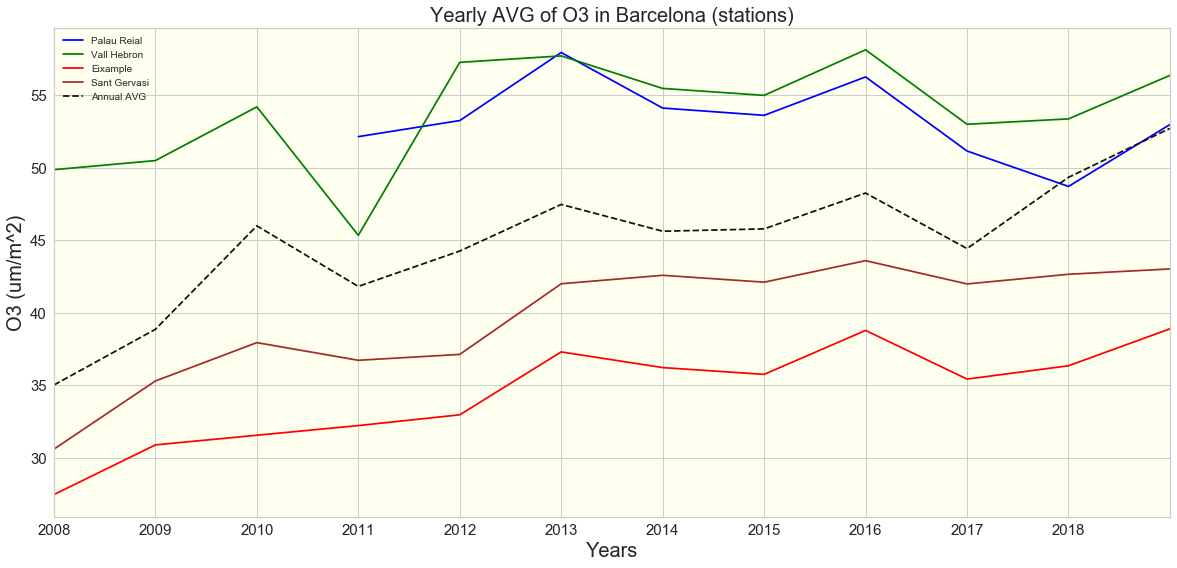

In [86]:
ax = plt.axes()
ax.set_facecolor("ivory")
#year_avg_ciu_o3.O3.plot(figsize=(20,6), label='Ciutadella', legend= True)
year_avg_palau_o3.O3.plot(figsize=(20,9), label='Palau Reial', legend= True, color='blue')
year_avg_vall_o3.O3.plot(figsize=(20,9), label='Vall Hebron', legend= True, color='green')
#year_avg_observatori_o3.O3.plot(figsize=(20,9), label='Observatori Pompeu Fabra', legend= True)
year_avg_eixample_O3.O3.plot(figsize=(20,9), label='Eixample', legend= True, color='red')
year_avg_gervasi_o3.O3.plot(figsize=(20,9), label='Sant Gervasi', legend= True, color='brown')
year_avg_o3.O3.plot(figsize=(20,9), label='Annual AVG', legend= True, color='k', linestyle='--')

plt.yticks(size = 15)
plt.title('Yearly AVG of O3 in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('O3 (um/m^2)', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
#plt.savefig('006_Yearly_pollutants_O3_in_Barcelona_presentation.png', dpi=1000)
plt.show()

In [87]:

year_avg_palau_o3['palau_o3']=year_avg_palau_o3['O3']
year_avg_vall_o3['vall_o3']=year_avg_vall_o3['O3']
year_avg_eixample_O3['eix_o3']=year_avg_eixample_O3['O3']
year_avg_gervasi_o3['gervasi_O3']=year_avg_gervasi_o3['O3']

In [88]:
o3_df=pd.concat([year_avg_palau_o3.palau_o3, year_avg_vall_o3.vall_o3, year_avg_eixample_O3.eix_o3, year_avg_gervasi_o3.gervasi_O3], axis=1)
o3_df.gervasi_O3.tolist()



[30.586353685516173,
 35.284313944647636,
 37.92853997303078,
 36.71063636978467,
 37.11622702674263,
 41.98625413498553,
 42.570345642049084,
 42.09539677315315,
 43.578482867247146,
 41.973757377138284,
 42.64016477564768,
 43.00804261060465]

In [89]:
r = [0,1,2,3,4, 5, 6, 7, 8, 9,10,11]
raw_data = {'Palau': [0,
 0,
 0,
 52.12994978232128,
 53.238086472785454,
 57.92849817448545,
 54.099589293120694,
 53.598705998685176,
 56.24642134066934,
 51.139045819484615,
 48.69640031932562,
 52.962973095629245], \
        'Vall': [49.851618139764064,
 50.47895176044893,
 54.18192124441226,
 45.32642091284674,
 57.25146404260323,
 57.69626409876492,
 55.453615646845506,
 54.97558419994428,
 58.116648774635706,
 52.98100758147059,
 53.35336784261182,
 56.3526450802146], \
        'Eixample': [27.453169681568596,
 30.87707239770195,
 0,
 32.209004572795926,
 32.951826566106234,
 37.288090784421414,
 36.20694731576899,
 35.73967801443871,
 38.769205525314604,
 35.41283468574514,
 36.33266489878458,
 38.880148607597995], \
        'gervasi': [30.586353685516173,
 35.284313944647636,
 37.92853997303078,
 36.71063636978467,
 37.11622702674263,
 41.98625413498553,
 42.570345642049084,
 42.09539677315315,
 43.578482867247146,
 41.973757377138284,
 42.64016477564768,
 43.00804261060465]}
            
        
df_1 = pd.DataFrame(raw_data)

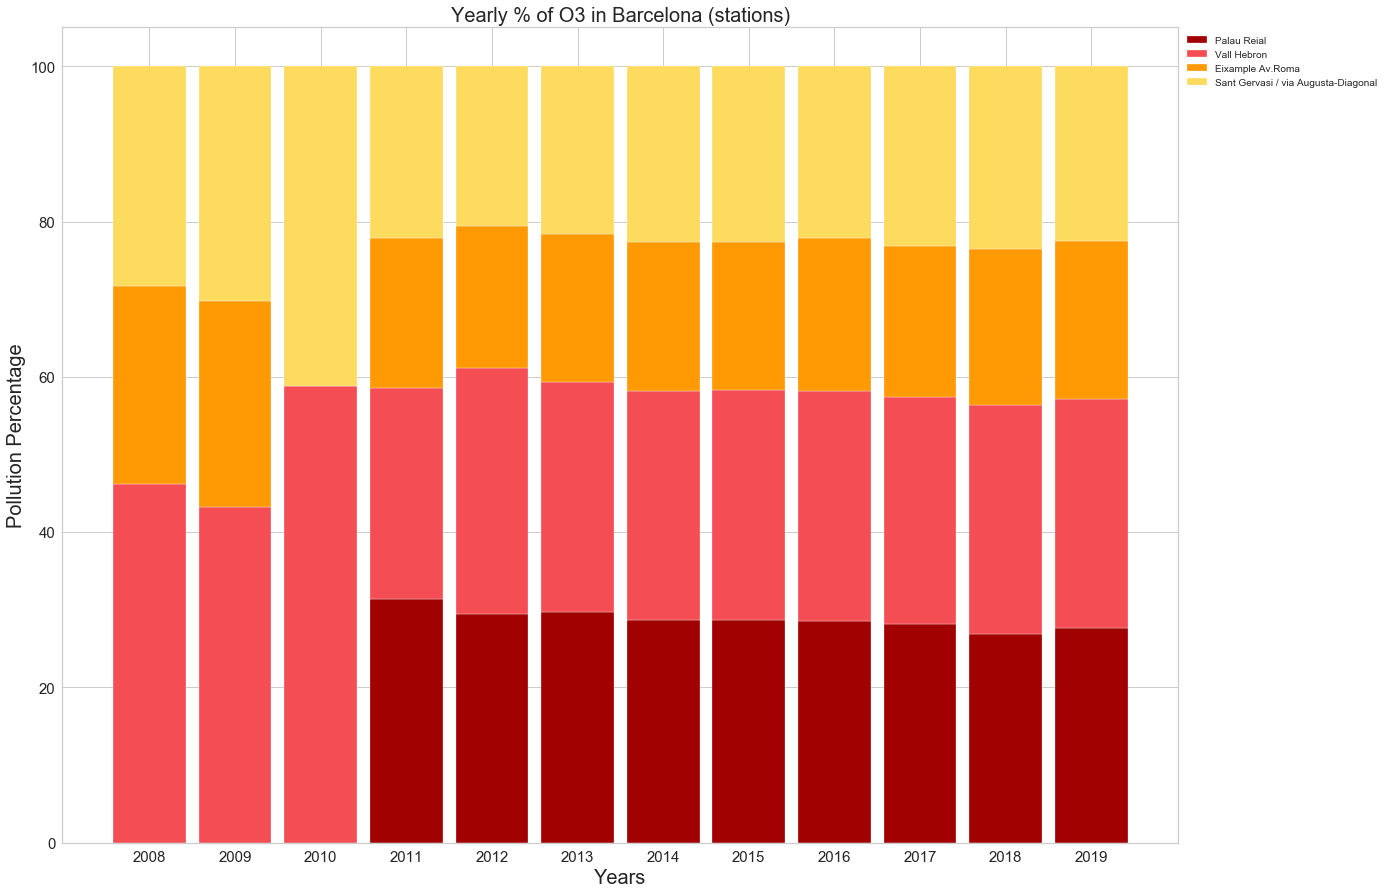

In [90]:


plt.figure(figsize=(20,15))

# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df_1['Palau'], df_1['Vall'], df_1['Eixample'], df_1['gervasi'])]
Palau = [i / j * 100 for i,j in zip(df_1['Palau'], totals)]
vall = [i / j * 100 for i,j in zip(df_1['Vall'], totals)]
eixample = [i / j * 100 for i,j in zip(df_1['Eixample'], totals)]
gervasi = [i / j * 100 for i,j in zip(df_1['gervasi'], totals)]


# plot
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
            '2019')
# Create PFHxA Bars
plt.bar(r, Palau, color='#A20101', edgecolor='white', width=barWidth, label="Palau Reial")
# Create PFHpA Bars
plt.bar(r, vall, bottom=Palau, color='#F44E54', edgecolor='white', 
width=barWidth, label="Vall Hebron")
# Create PFOA Bars
plt.bar(r, eixample, bottom=[i+j for i,j in zip(Palau, vall)], color='#FF9904', 
edgecolor='white', width=barWidth, label="Eixample Av.Roma")
# Create PFNA Bars
plt.bar(r, gervasi, bottom=[i+j+k for i,j,k in zip(Palau, vall, eixample)], 
color='#FDDB5E', edgecolor='white', width=barWidth, label="Sant Gervasi / via Augusta-Diagonal")



# Custom x axis
plt.title('Yearly % of O3 in Barcelona (stations)', size=20)
plt.xticks(r, names, size=15)
plt.yticks(size=15)
plt.xlabel("Years", size=20)

# Custom y axis
plt.ylabel("Pollution Percentage", size=20)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.savefig('006_Yearly_pollutants_O3%_in_Barcelona_presentation.png', dpi=210)
plt.show()


In [91]:
print ('Años más contaminantes ciutadella: \n',year_avg_ciu_o3.nlargest(5, ['O3'])) 
print ('Años más contaminantes Palau: \n',year_avg_palau_o3.nlargest(5, ['O3'])) 

Años más contaminantes ciutadella: 
 CONTAMINANTE         O3
year                   
2010          45.441404
2016          44.801798
2011          44.443066
2019          43.122098
2013          42.489590
Años más contaminantes Palau: 
 CONTAMINANTE         O3   palau_o3
year                              
2013          57.928498  57.928498
2016          56.246421  56.246421
2014          54.099589  54.099589
2015          53.598706  53.598706
2012          53.238086  53.238086


# Contaminacion de NO desde las diferentes estaciones

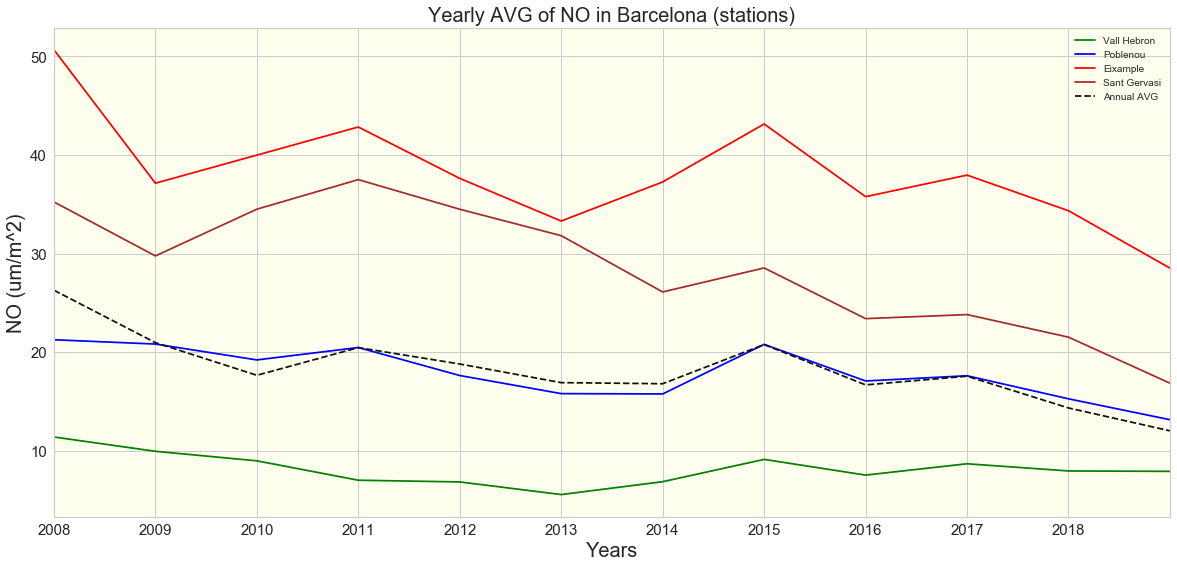

In [92]:
ax = plt.axes()
ax.set_facecolor("ivory")
#year_avg_ciu_NO.NO.plot(figsize=(20,9), label='Ciutadella', legend= True, color='red')
#year_avg_palau_no.NO.plot(figsize=(20,9), label='Palau Reial', legend= True, color='blue')
year_avg_vall_no.NO.plot(figsize=(20,9), label='Vall Hebron', legend= True, color='green')
year_avg_poblenou_no.NO.plot(figsize=(20,9), label='Poblenou', legend= True, color='blue')
#year_avg_observatori_no.NO.plot(figsize=(20,9), label='Observatori Pompeu Fabra', legend= True, color='green')
year_avg_eixample_no.NO.plot(figsize=(20,9), label='Eixample', legend= True, color='red')
#year_avg_sants_no.NO.plot(figsize=(20,9), label='Sants', legend= True, color='green')
year_avg_gervasi_no.NO.plot(figsize=(20,9), label='Sant Gervasi', legend= True, color='brown')
year_avg_no.NO.plot(figsize=(20,9), label='Annual AVG', legend= True, color='k', linestyle='--')
plt.yticks(size = 15)
plt.title('Yearly AVG of NO in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('NO (um/m^2)', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
#plt.savefig('007_Yearly_pollutants_NO_in_Barcelona_presentation.png', dpi=1000)
plt.show()

In [93]:
year_avg_poblenou_no['poblenou_no']=year_avg_poblenou_no['NO']
year_avg_vall_no['vall_no']=year_avg_vall_no['NO']
year_avg_eixample_no['eix_no']=year_avg_eixample_no['NO']
year_avg_gervasi_no['gervasi_no']=year_avg_gervasi_no['NO']

In [94]:
no_df=pd.concat([year_avg_poblenou_no.poblenou_no, year_avg_vall_no.vall_no, year_avg_eixample_no.eix_no, year_avg_gervasi_no.gervasi_no], axis=1)
no_df.gervasi_no.tolist()

[35.242484749715246,
 29.77167997487,
 34.509126457667236,
 37.506097662181666,
 34.503134811043715,
 31.824925723138712,
 26.11946159043343,
 28.55252208021959,
 23.41366081611696,
 23.825704415041752,
 21.536221098236734,
 16.87345454196756]

In [95]:
r = [0,1,2,3,4, 5, 6, 7, 8, 9,10,11]
raw_data = {'Poblenou': [21.274175344818794,
 20.838405576281687,
 19.22955830624914,
 20.486104762319442,
 17.648137334914097,
 15.813213728217164,
 15.779074129426835,
 20.804885658254932,
 17.0954146849808,
 17.62345847303846,
 15.287497710539885,
 13.170705198512627], \
        'Vall': [11.416212747762929,
 9.967045810874392,
 9.00073351866343,
 7.035445938909084,
 6.8609124718607415,
 5.581506726904595,
 6.88502185457214,
 9.14681263097177,
 7.554479102053291,
 8.701683235583205,
 7.974680173493853,
 7.933034720610153], \
        'Eixample': [50.665841743834164,
 37.14199115528572,
 0,
 42.83936808493908,
 37.63013666822839,
 33.30913523715825,
 37.27018901867092,
 43.146325111713494,
 35.77933947817556,
 37.96237037164444,
 34.35518712179223,
 28.5379106032938], \
        'gervasi': [35.242484749715246,
 29.77167997487,
 34.509126457667236,
 37.506097662181666,
 34.503134811043715,
 31.824925723138712,
 26.11946159043343,
 28.55252208021959,
 23.41366081611696,
 23.825704415041752,
 21.536221098236734,
 16.87345454196756]}
            
        
df_2 = pd.DataFrame(raw_data)

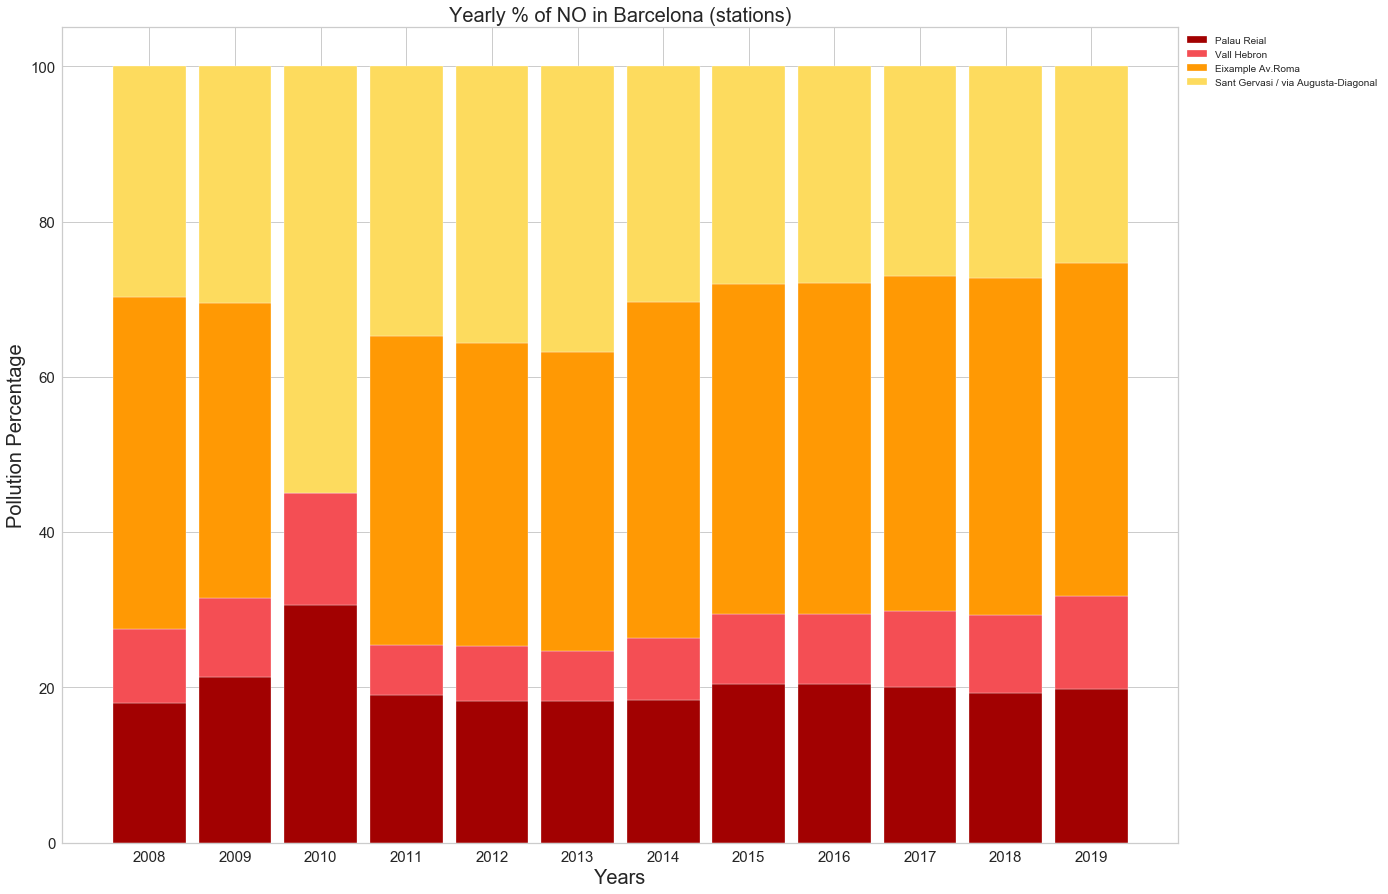

In [96]:
plt.figure(figsize=(20,15))

# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df_2['Poblenou'], df_2['Vall'], df_2['Eixample'], df_2['gervasi'])]
Poblenou = [i / j * 100 for i,j in zip(df_2['Poblenou'], totals)]
vall = [i / j * 100 for i,j in zip(df_2['Vall'], totals)]
eixample = [i / j * 100 for i,j in zip(df_2['Eixample'], totals)]
gervasi = [i / j * 100 for i,j in zip(df_2['gervasi'], totals)]


# plot
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
            '2019')
# Create PFHxA Bars
plt.bar(r, Poblenou, color='#A20101', edgecolor='white', width=barWidth, label="Palau Reial")
# Create PFHpA Bars
plt.bar(r, vall, bottom=Poblenou, color='#F44E54', edgecolor='white', 
width=barWidth, label="Vall Hebron")
# Create PFOA Bars
plt.bar(r, eixample, bottom=[i+j for i,j in zip(Poblenou, vall)], color='#FF9904', 
edgecolor='white', width=barWidth, label="Eixample Av.Roma")
# Create PFNA Bars
plt.bar(r, gervasi, bottom=[i+j+k for i,j,k in zip(Poblenou, vall, eixample)], 
color='#FDDB5E', edgecolor='white', width=barWidth, label="Sant Gervasi / via Augusta-Diagonal")



# Custom x axis
plt.title('Yearly % of NO in Barcelona (stations)', size=20)
plt.xticks(r, names, size=15)
plt.yticks(size=15)
plt.xlabel("Years", size=20)

# Custom y axis
plt.ylabel("Pollution Percentage", size=20)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.savefig('007_Yearly_pollutants_NO%_in_Barcelona_presentation.png', dpi=210)
plt.show()


# Contaminacion de NO2 desde las diferentes estaciones

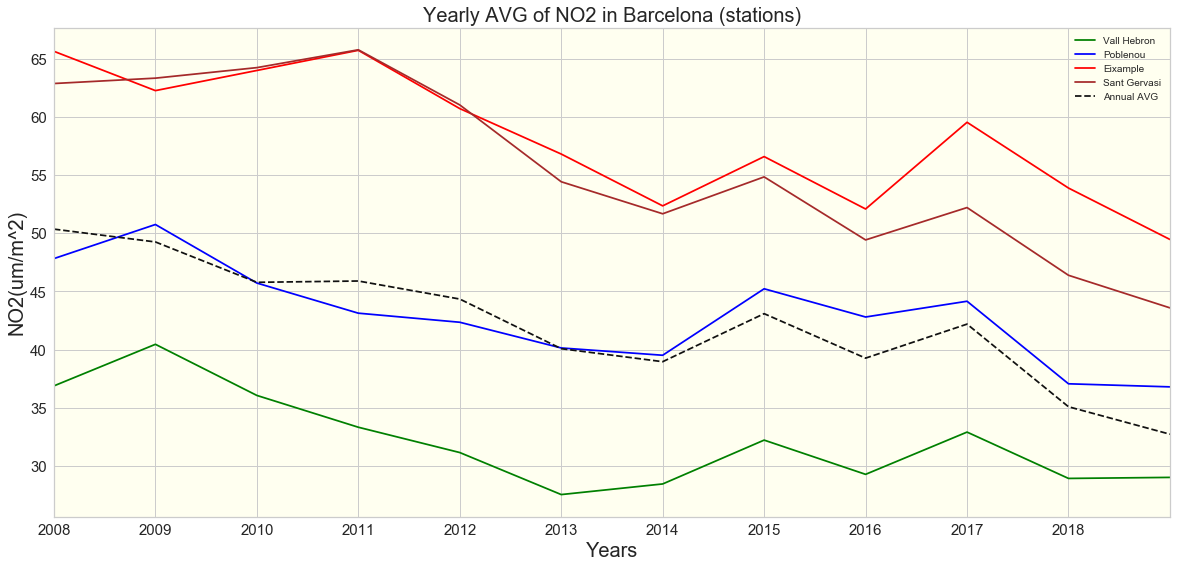

In [97]:
ax = plt.axes()
ax.set_facecolor("ivory")
#year_avg_ciu_NO2.NO2.plot(figsize=(20,9), label='Ciutadella', legend= True)
#year_avg_palau_no2.NO2.plot(figsize=(20,9), label='Palau Reial', legend= True, color='blue')
year_avg_vall_no2.NO2.plot(figsize=(20,9), label='Vall Hebron', legend= True, color='green')
year_avg_poblenou_no2.NO2.plot(figsize=(20,9), label='Poblenou', legend= True, color='blue')
#year_avg_observatori_no2.NO2.plot(figsize=(20,9), label='Observatori Pompeu Fabra', legend= True)
year_avg_eixample_no2.NO2.plot(figsize=(20,9), label='Eixample', legend= True, color='red')
#year_avg_sants_no2.NO2.plot(figsize=(20,9), label='Sants', legend= True, color='brown')
year_avg_gervasi_no2.NO2.plot(figsize=(20,9), label='Sant Gervasi', legend= True, color='brown')
year_avg_no2.NO2.plot(figsize=(20,9), label='Annual AVG', legend= True, color='k', linestyle='--')
plt.yticks(size = 15)
plt.title('Yearly AVG of NO2 in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('NO2(um/m^2)', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)

#plt.savefig('008_Yearly_pollutants_NO2_in_Barcelona_presentation.png', dpi=1000)
plt.show()



In [98]:
year_avg_poblenou_no2['poblenou_no2']=year_avg_poblenou_no2['NO2']
year_avg_vall_no2['vall_no2']=year_avg_vall_no2['NO2']
year_avg_eixample_no2['eix_no2']=year_avg_eixample_no2['NO2']
year_avg_gervasi_no2['gervasi_no2']=year_avg_gervasi_no2['NO2']

In [99]:
no2_df=pd.concat([year_avg_poblenou_no2.poblenou_no2, year_avg_vall_no2.vall_no2, year_avg_eixample_no2.eix_no2, year_avg_gervasi_no2.gervasi_no2], axis=1)
no2_df.gervasi_no2.tolist()


[62.8755383032691,
 63.336119216865974,
 64.2409061615424,
 65.77343970899067,
 61.03454523677305,
 54.43090484312193,
 51.67809776915565,
 54.848923872616474,
 49.430468745030126,
 52.21210643010376,
 46.391541457031515,
 43.590286098696645]

In [100]:
r = [0,1,2,3,4, 5, 6, 7, 8, 9,10,11]
raw_data = {'Poblenou': [47.826731836022816,
 50.75609867552441,
 45.72493846062684,
 43.13372802198839,
 42.35360651996747,
 40.14446817197516,
 39.51730321568247,
 45.23052831253481,
 42.805298927410014,
 44.1593402723279,
 37.06328520944695,
 36.799858814647514], \
        'Vall': [36.8849452135141,
 40.458302331142065,
 36.06364204736419,
 33.330013935838984,
 31.15444198250262,
 27.542523631680734,
 28.454460638224607,
 32.22340110719182,
 29.280435339947722,
 32.9123723843444,
 28.92922048444146,
 29.01798212173691], \
        'Eixample': [65.64344207555303,
 62.26438792434257,
 0,
 65.72894476065525,
 60.72056567060409,
 56.8124855924838,
 52.35849116647715,
 56.59448474229313,
 52.0899972366426,
 59.542989622860574,
 53.889754737023935,
 49.470195789887946], \
        'gervasi': [62.8755383032691,
 63.336119216865974,
 64.2409061615424,
 65.77343970899067,
 61.03454523677305,
 54.43090484312193,
 51.67809776915565,
 54.848923872616474,
 49.430468745030126,
 52.21210643010376,
 46.391541457031515,
 43.590286098696645]}
            
        
df_3 = pd.DataFrame(raw_data)

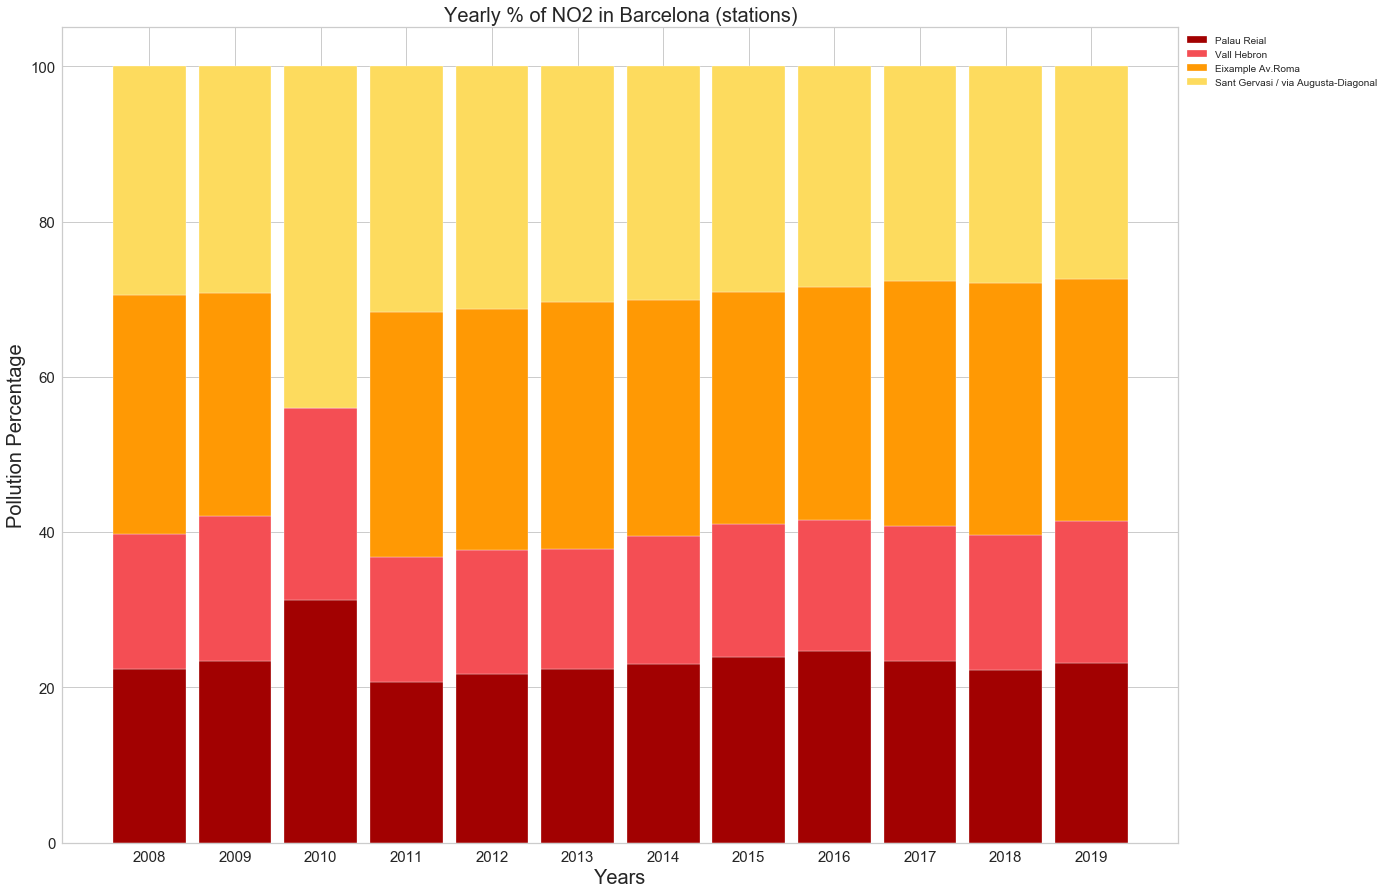

In [101]:
plt.figure(figsize=(20,15))

# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df_3['Poblenou'], df_3['Vall'], df_3['Eixample'], df_3['gervasi'])]
Poblenou = [i / j * 100 for i,j in zip(df_3['Poblenou'], totals)]
vall = [i / j * 100 for i,j in zip(df_3['Vall'], totals)]
eixample = [i / j * 100 for i,j in zip(df_3['Eixample'], totals)]
gervasi = [i / j * 100 for i,j in zip(df_3['gervasi'], totals)]


# plot
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
            '2019')
# Create PFHxA Bars
plt.bar(r, Poblenou, color='#A20101', edgecolor='white', width=barWidth, label="Palau Reial")
# Create PFHpA Bars
plt.bar(r, vall, bottom=Poblenou, color='#F44E54', edgecolor='white', 
width=barWidth, label="Vall Hebron")
# Create PFOA Bars
plt.bar(r, eixample, bottom=[i+j for i,j in zip(Poblenou, vall)], color='#FF9904', 
edgecolor='white', width=barWidth, label="Eixample Av.Roma")
# Create PFNA Bars
plt.bar(r, gervasi, bottom=[i+j+k for i,j,k in zip(Poblenou, vall, eixample)], 
color='#FDDB5E', edgecolor='white', width=barWidth, label="Sant Gervasi / via Augusta-Diagonal")



# Custom x axis
plt.title('Yearly % of NO2 in Barcelona (stations)', size=20)
plt.xticks(r, names, size=15)
plt.yticks(size=15)
plt.xlabel("Years", size=20)

# Custom y axis
plt.ylabel("Pollution Percentage", size=20)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.savefig('008_Yearly_pollutants_NO2%_in_Barcelona_presentation.png', dpi=210)
plt.show()


In [102]:
## print ('Años más contaminantes ciutadella: \n',year_avg_ciu_NO2.nlargest(5, ['NO2'])) 
print ('Años más contaminantes Palau: \n',year_avg_palau_no2.nlargest(5, ['NO2'])) 


Años más contaminantes Palau: 
 CONTAMINANTE        NO2
year                   
2012          36.665768
2015          34.663915
2013          32.743091
2017          32.513600
2011          32.509025


# Contaminacion de SO2 desde las diferentes estaciones

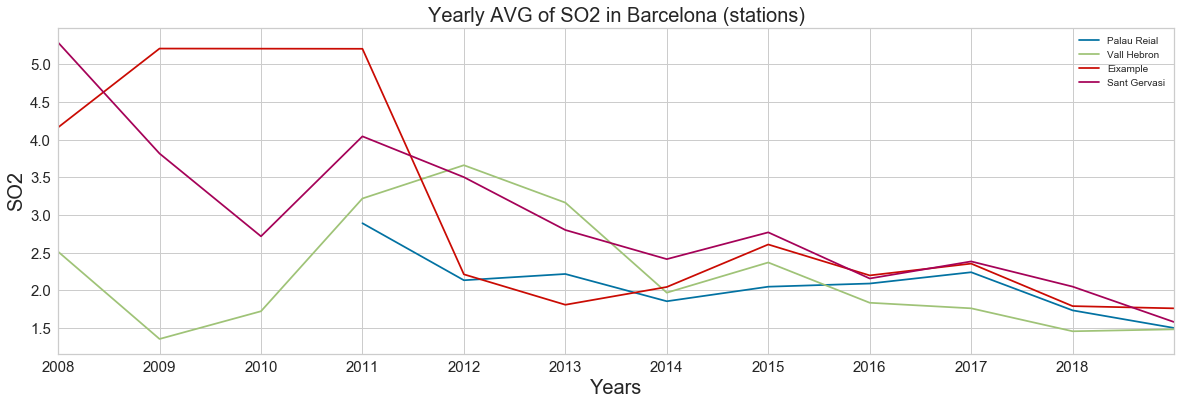

In [103]:
sns.color_palette("Paired")
year_avg_palau_so2.SO2.plot(figsize=(20,6), label='Palau Reial', legend= True)
year_avg_vall_so2.SO2.plot(figsize=(20,6), label='Vall Hebron', legend= True)
year_avg_eixample_so2.SO2.plot(figsize=(20,6), label='Eixample', legend= True)
year_avg_gervasi_so2.SO2.plot(figsize=(20,6), label='Sant Gervasi', legend= True)
plt.yticks(size = 15)
plt.title('Yearly AVG of SO2 in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('SO2', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

# Contaminacion de PM10 desde las diferentes estaciones

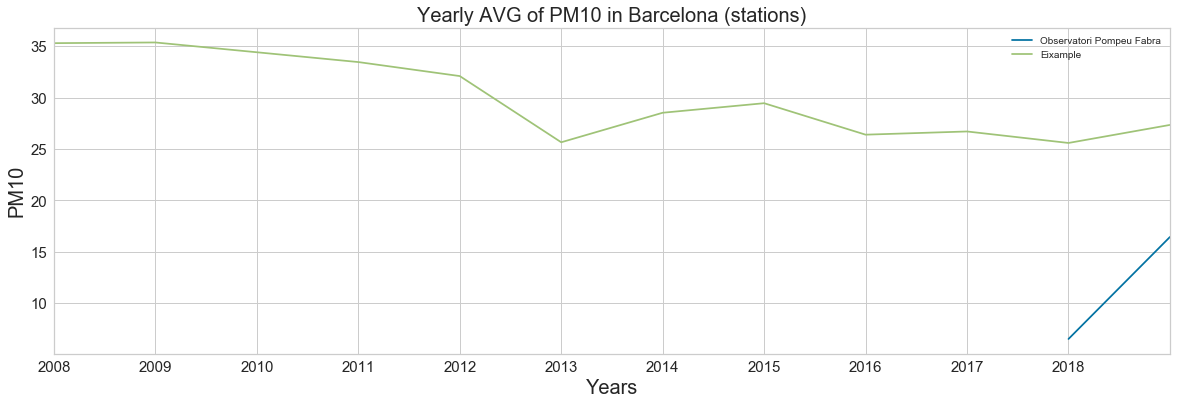

In [104]:
sns.color_palette("Paired")
year_avg_observatori_PM10.PM10.plot(figsize=(20,6), label='Observatori Pompeu Fabra', legend= True)
year_avg_eixample_pm10.PM10.plot(figsize=(20,6), label='Eixample', legend= True)

plt.yticks(size = 15)
plt.title('Yearly AVG of PM10 in Barcelona (stations)', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('PM10', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()


### mejora de las graficas. Eliminar

# CO

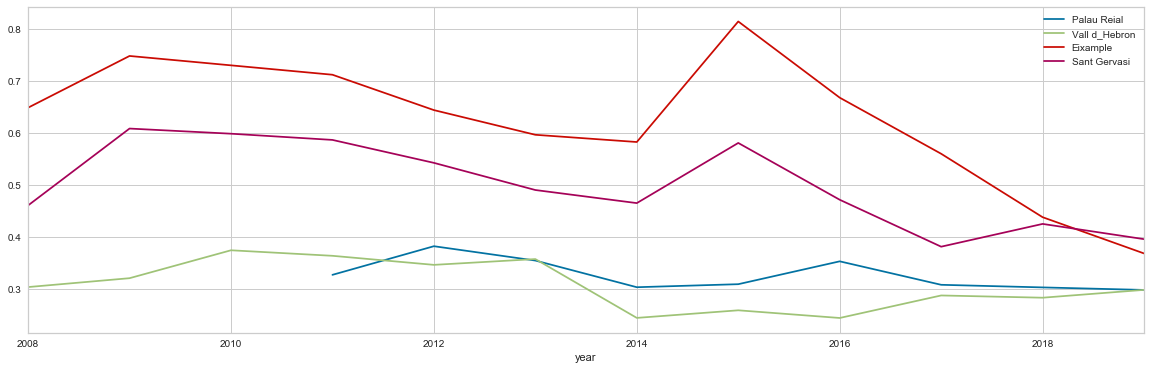

In [105]:
year_avg_palau_co.CO.plot(figsize=(20,6), label='Palau Reial', legend= True)
year_avg_vall_co.CO.plot(figsize=(20,6), label='Vall d_Hebron', legend= True)
#year_avg_torre_co.CO.plot(figsize=(20,6), label='Torre Girona', legend= True)
year_avg_eixample_co.CO.plot(figsize=(20,6), label='Eixample', legend= True)
year_avg_gervasi_co.CO.plot(figsize=(20,6), label='Sant Gervasi', legend= True)

## preparing data for processin visualization

In [106]:
cond_palau_co = year_avg_palau_co.index == 2011
cond_vall_co = year_avg_vall_co.index == 2008
cond_eixample_co = year_avg_eixample_co.index == 2008
cond_gervasi_co = year_avg_gervasi_co.index == 2008

# calculate value to subtract
first_palau_co = year_avg_palau_co['CO'].where(cond_palau_co).ffill().mask(cond_palau_co)
first_vall_co = year_avg_vall_co['CO'].where(cond_vall_co).ffill().mask(cond_vall_co)
first_eixample_co = year_avg_eixample_co['CO'].where(cond_eixample_co).ffill().mask(cond_eixample_co)
first_gervasi_co = year_avg_gervasi_co['CO'].where(cond_gervasi_co).ffill().mask(cond_gervasi_co)

# perform calculation
year_avg_palau_co['CO_percentage'] = ((year_avg_palau_co['CO'] - first_palau_co) / first_palau_co)*100
year_avg_vall_co['CO_percentage'] = ((year_avg_vall_co['CO'] - first_vall_co) / first_vall_co)*100
year_avg_eixample_co['CO_percentage'] = ((year_avg_eixample_co['CO'] - first_eixample_co) / first_eixample_co)*100
year_avg_gervasi_co['CO_percentage'] = ((year_avg_gervasi_co['CO'] - first_gervasi_co) / first_gervasi_co)*100

In [107]:
year_avg_gervasi_co

CONTAMINANTE,CO,gervasi_co,CO_percentage
year,,,
2008,0.459976,0.459976,NaN
2009,0.608000,0.608000,32.180969
2010,0.598091,0.598091,30.026606
2011,0.586131,0.586131,27.426543
2012,0.541955,0.541955,17.822557
2013,0.489649,0.489649,6.451043
2014,0.464462,0.464462,0.975299
2015,0.580283,0.580283,26.155140
2016,0.470914,0.470914,2.378082


In [108]:
year_avg_palau_co['CO_percentage'] = year_avg_palau_co['CO_percentage'].fillna(0)
year_avg_vall_co['CO_percentage'] = year_avg_vall_co['CO_percentage'].fillna(0)
year_avg_eixample_co['CO_percentage'] = year_avg_eixample_co['CO_percentage'].fillna(0)
year_avg_gervasi_co['CO_percentage'] = year_avg_gervasi_co['CO_percentage'].fillna(0)

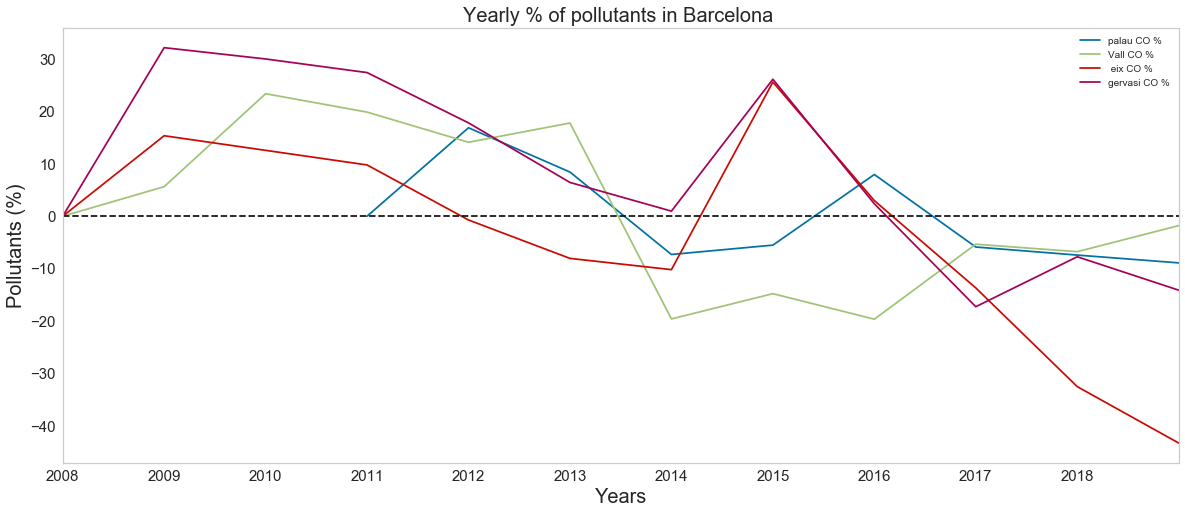

In [109]:
sns.color_palette("Paired")
year_avg_palau_co.CO_percentage.plot(figsize=(20,8), label='palau CO %', legend= True)
year_avg_vall_co.CO_percentage.plot(figsize=(20,8), label='Vall CO %', legend= True)
year_avg_eixample_co.CO_percentage.plot(figsize=(20,8), label=' eix CO %', legend= True)
year_avg_gervasi_co.CO_percentage.plot(figsize=(20,8), label='gervasi CO %', legend= True)



plt.yticks(size = 15)
plt.title('Yearly % of pollutants in Barcelona ', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('Pollutants (%)', size=20)
plt.xticks([x for x in range(2008,2019,1)], size=15)
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(False)
#plt.savefig('004_Yearly % of pollutants in Barcelona_presentation.png', dpi=1000)
plt.show()

In [110]:
print(year_avg_gervasi_co.shape)
print(year_avg_vall_co.shape)
print(year_avg_eixample_co)

(12, 3)
(12, 3)
CONTAMINANTE        CO    eix_co  CO_percentage
year                                           
2008          0.648165  0.648165       0.000000
2009          0.747776  0.747776      15.368076
2011          0.711645  0.711645       9.793801
2012          0.643532  0.643532      -0.714813
2013          0.595990  0.595990      -8.049705
2014          0.582094  0.582094     -10.193666
2015          0.814200  0.814200      25.616084
2016          0.667504  0.667504       2.983538
2017          0.559451  0.559451     -13.686930
2018          0.437313  0.437313     -32.530627
2019          0.367515  0.367515     -43.299118
